# Bharatviz demo

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saketkc/bharatviz/blob/main/server/examples/BharatViz_demo.ipynb)

BharatViz api allows you to generate publication-ready India choropleth maps with minimal code (3 lines):

```python
from bharatviz import BharatViz
bv = BharatViz()
bv.save_all_formats(your_data, basename="publication_map")
```


---

Disclaimer: The notebook takes you through different uses cases of the API. Please note that all the values used in this demo are arbitrary. These values are very likely incorrect - they are only used for demonstrating the capability of BharatViz API and should not be used for drawing any insights.

---

## Installation



In [ ]:
# Install dependencies
!pip install requests pillow pandas matplotlib -q

# Download the BharatViz python client
!wget -q https://gist.githubusercontent.com/saketkc/d448bf923abff490e755120e0cb62d3f/raw/d8452399f51a68d8a5514e293aa062772f1032d6/bharatviz.py

# Import libraries
from bharatviz import BharatViz, quick_map, quick_districts_map
import pandas as pd


API_URL = "https://bharatviz.saketlab.in/"

# Initialize client
bv = BharatViz(api_url=API_URL)

---

# State level maps

## Quickest way - from dictionary

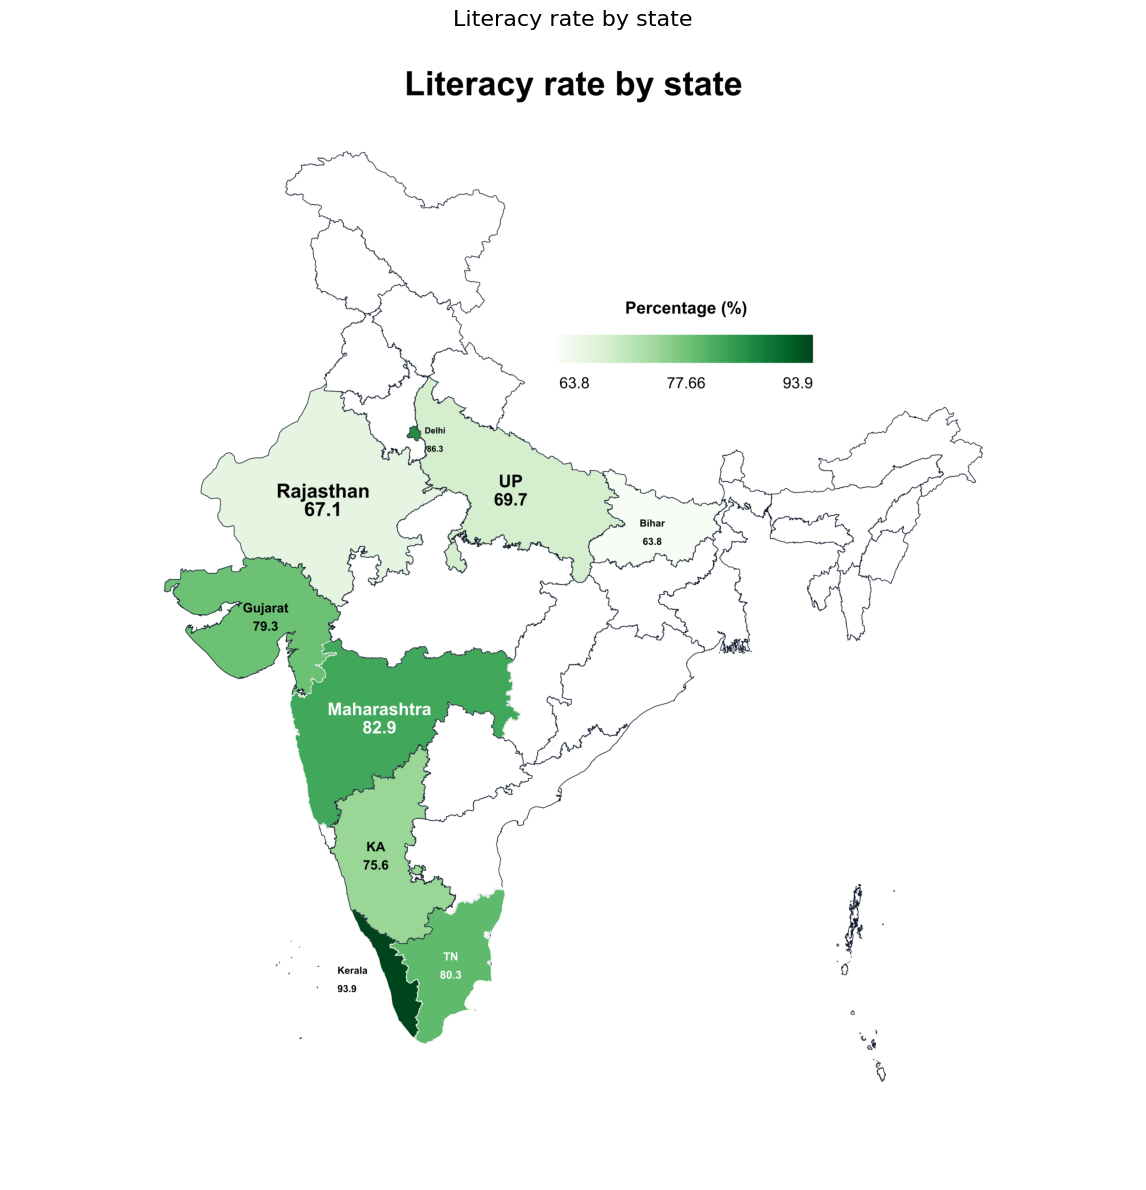

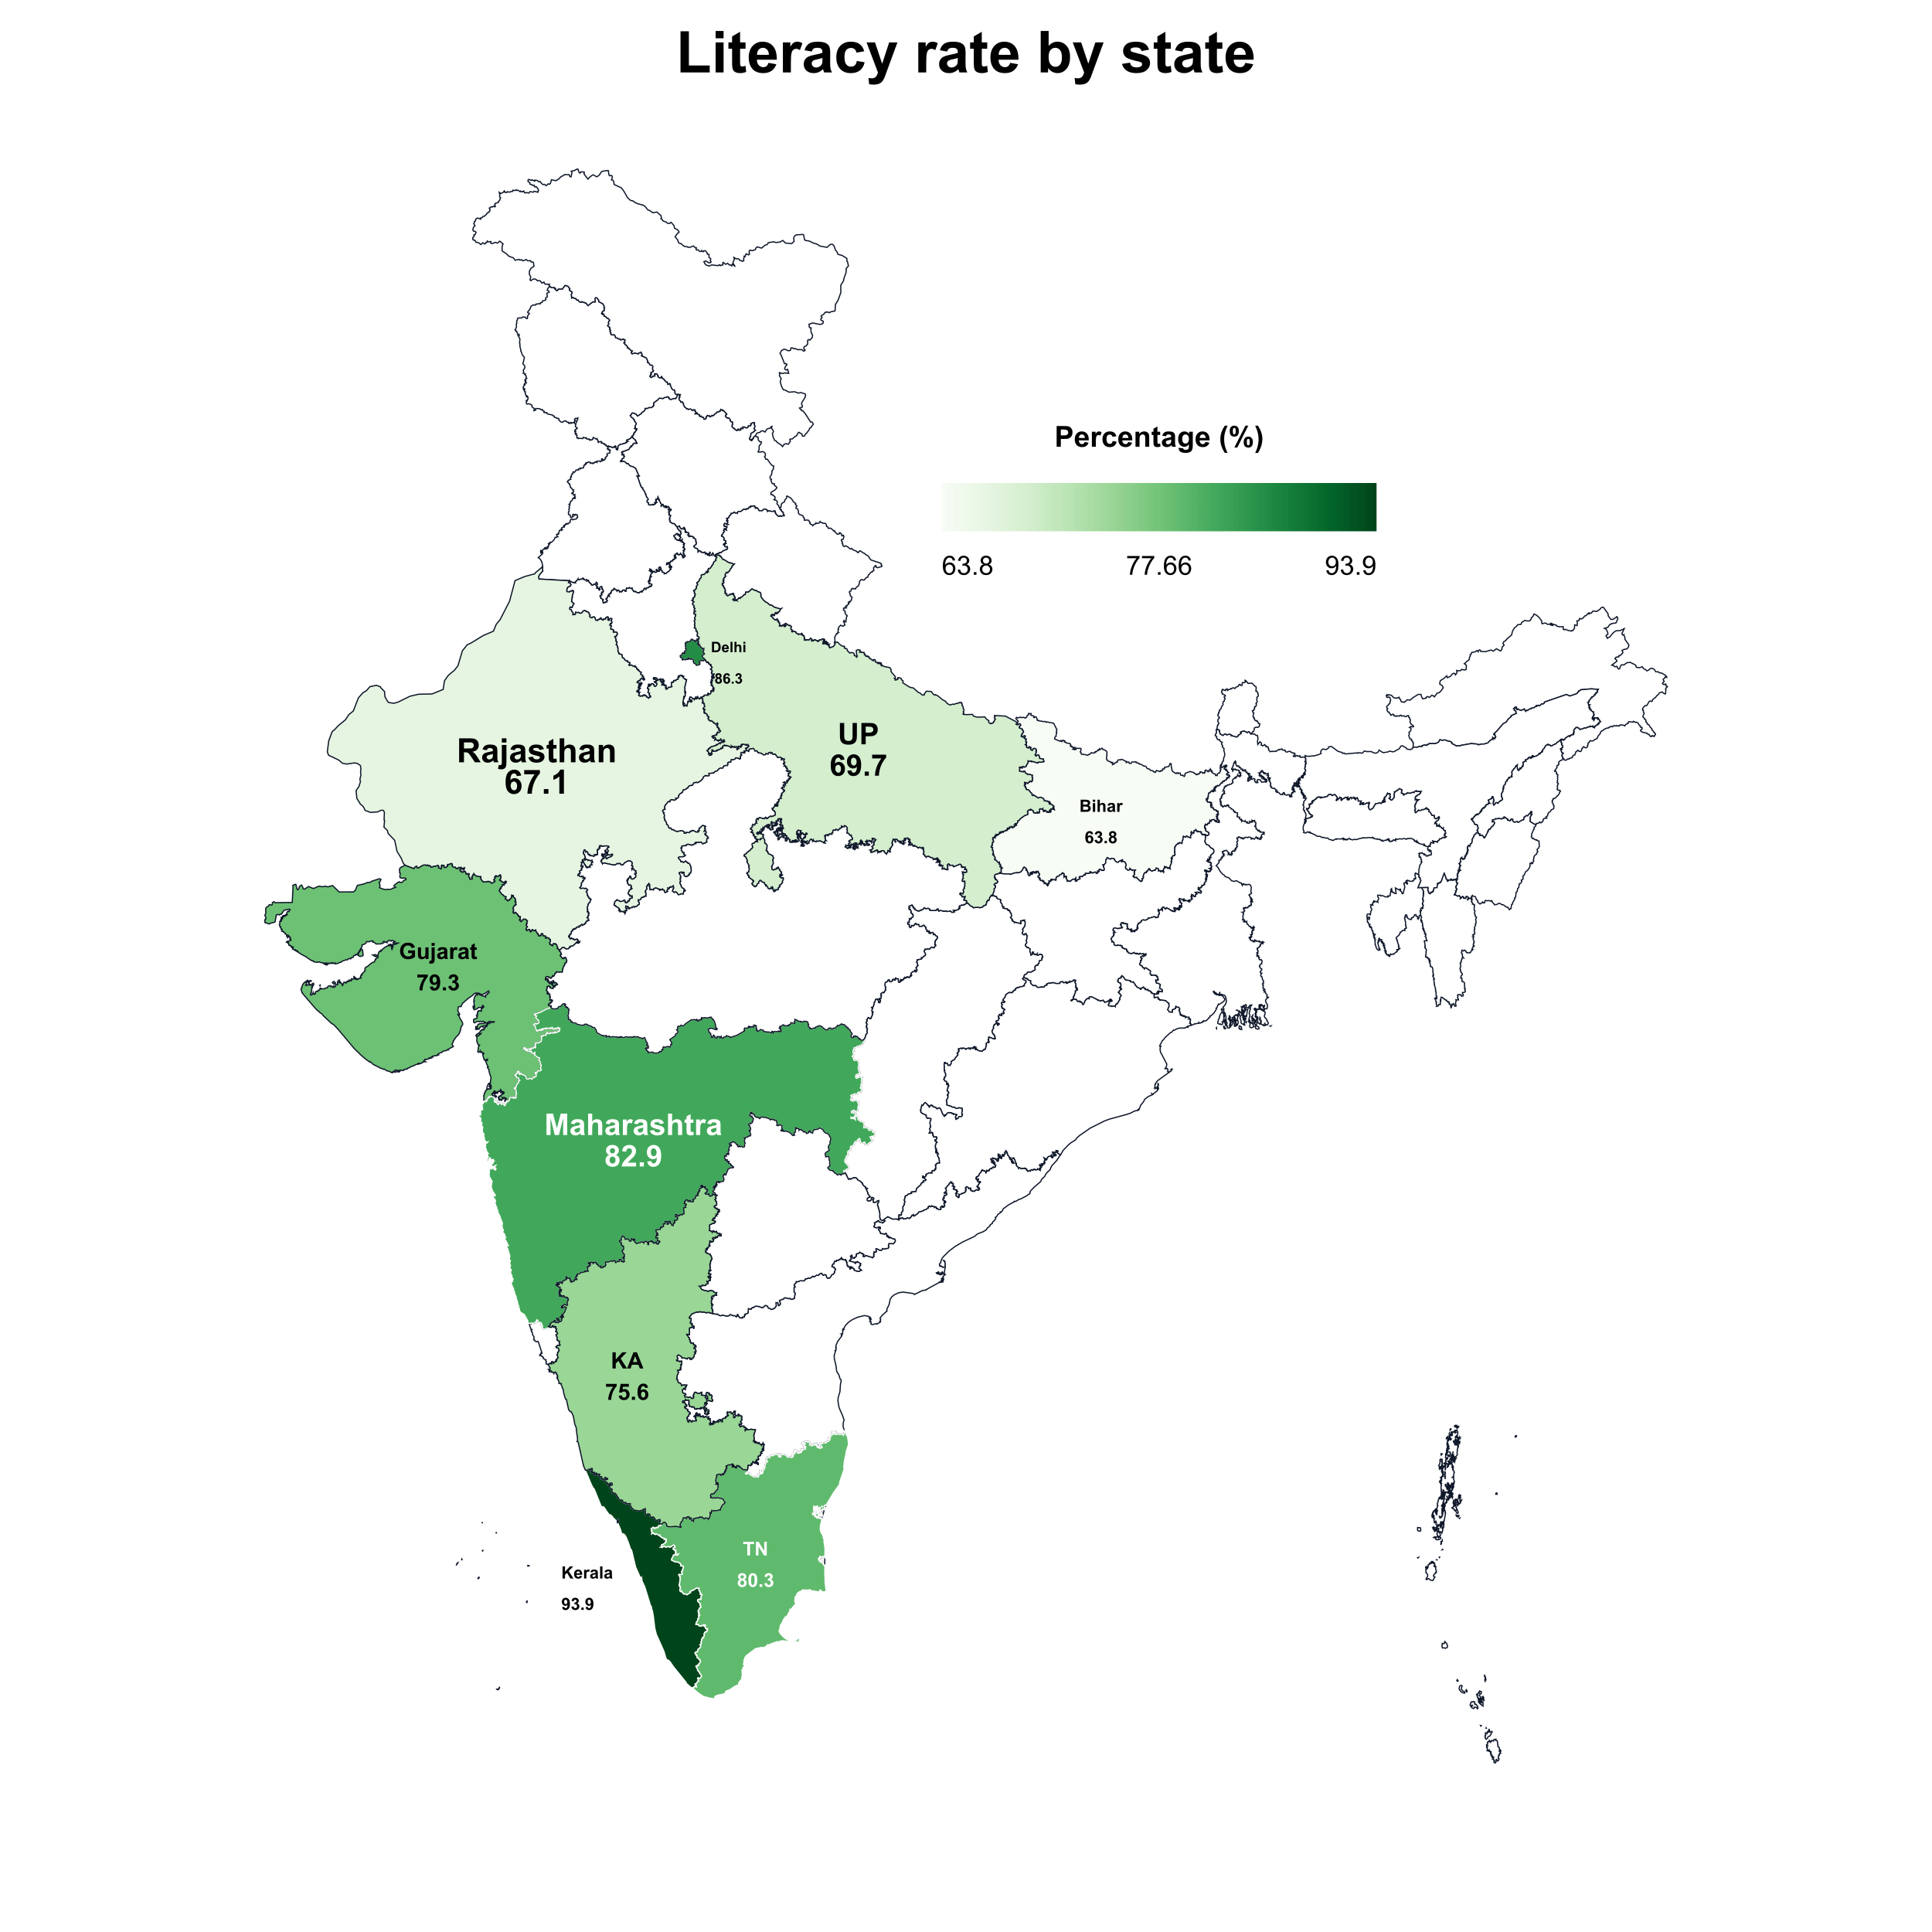

In [ ]:
# Create data from a simple dictionary
literacy_data = {
    "Kerala": 93.9,
    "Delhi": 86.3,
    "Maharashtra": 82.9,
    "Tamil Nadu": 80.3,
    "Gujarat": 79.3,
    "Karnataka": 75.6,
    "Uttar Pradesh": 69.7,
    "Bihar": 63.8,
    "Rajasthan": 67.1,
}

# Convert and display with one line!
quick_map(
    BharatViz.from_dict(literacy_data),
    title="Literacy rate by state",
    legend_title="Percentage (%)",
    color_scale="greens",
    api_url=API_URL,
)

## From pandas dataFrame

         state  gdp_growth
0  Maharashtra         7.8
1       Kerala         6.5
2    Karnataka         8.3
3   Tamil Nadu         8.7
4      Gujarat         8.1


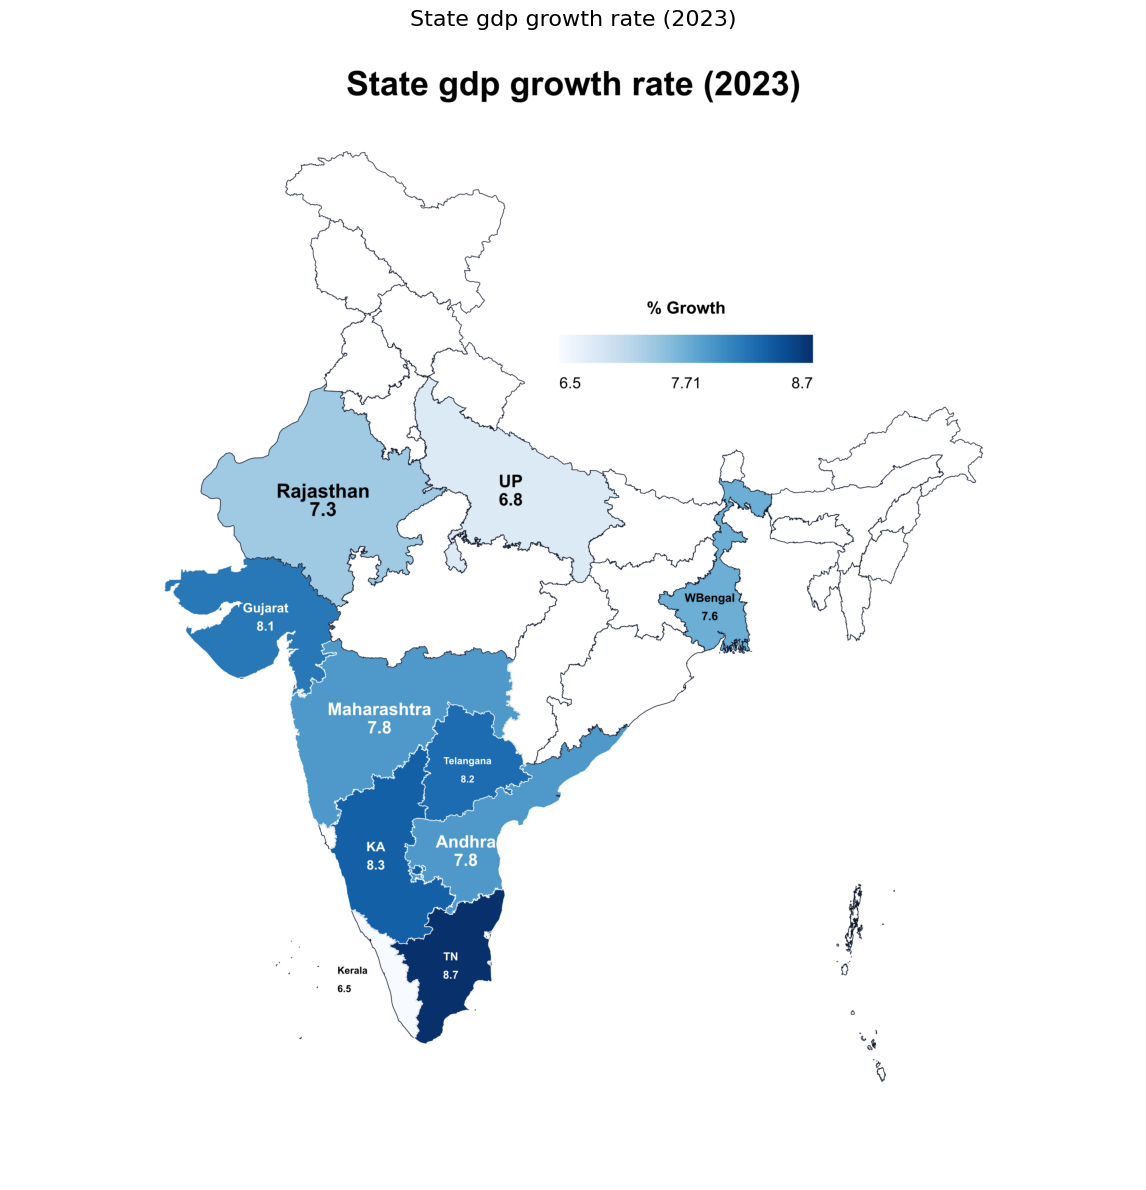

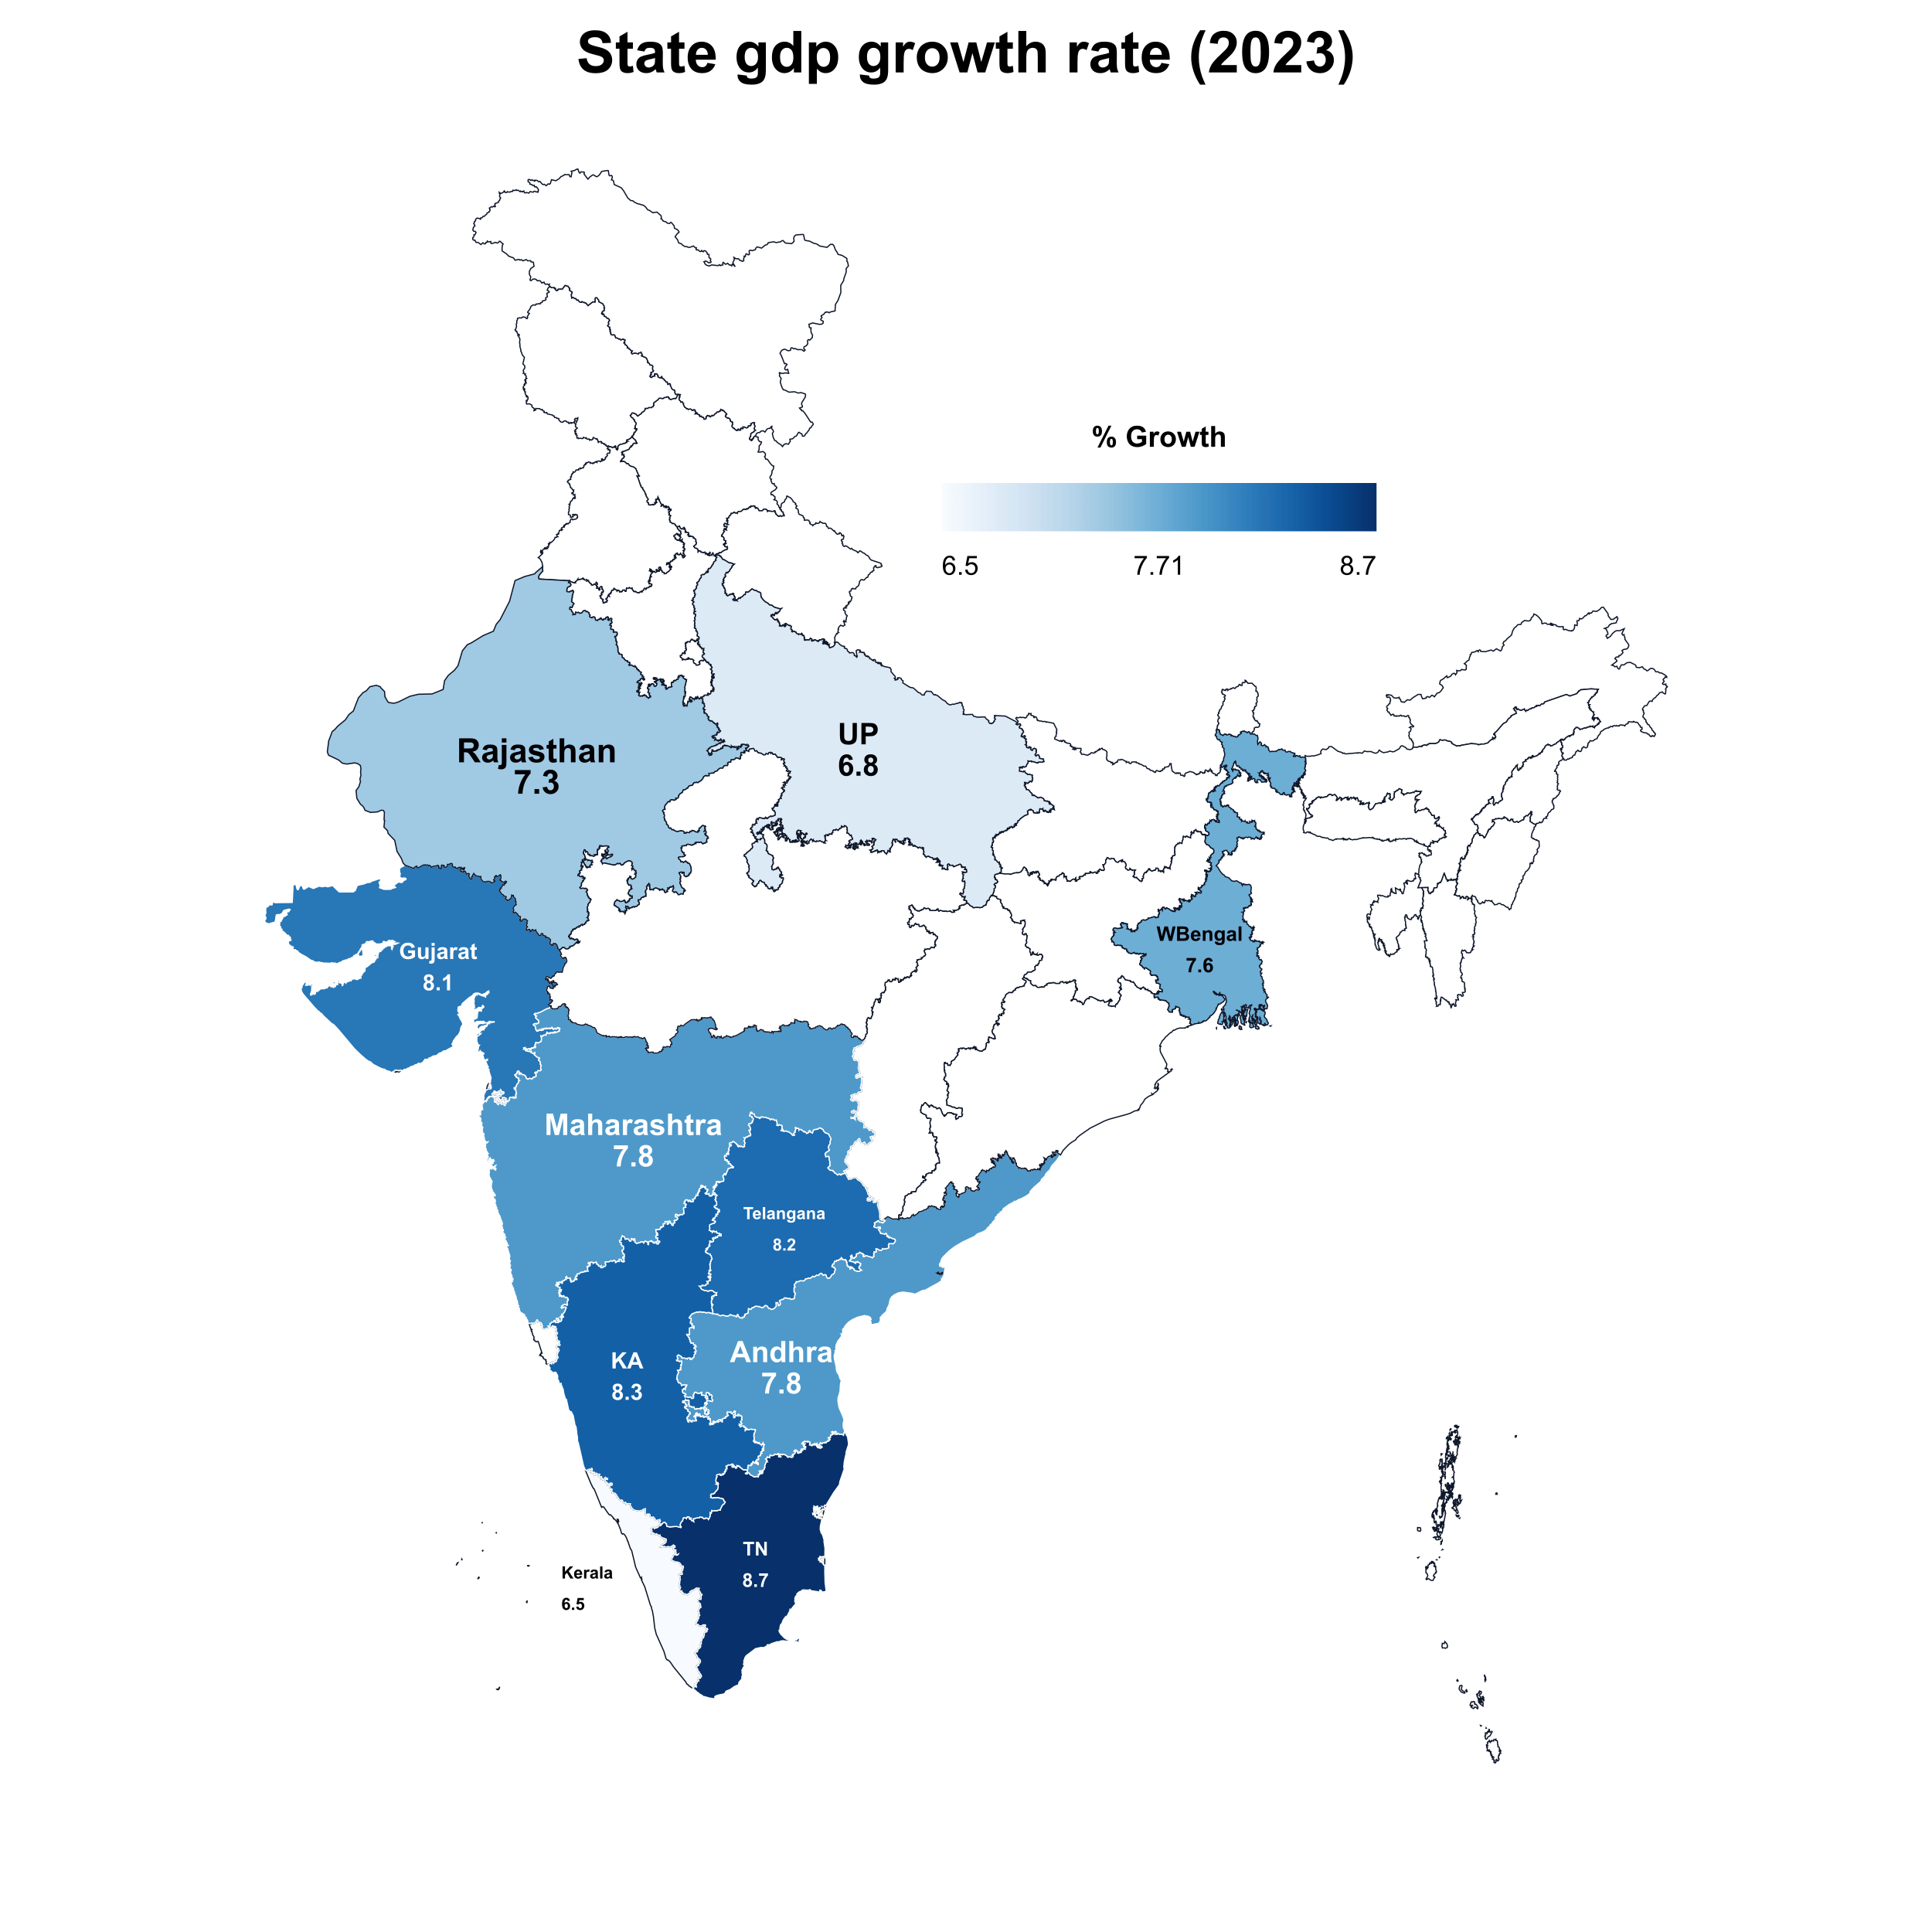

In [ ]:
# Create dataframe with state data
state_data = pd.DataFrame(
    {
        "state": [
            "Maharashtra",
            "Kerala",
            "Karnataka",
            "Tamil Nadu",
            "Gujarat",
            "Rajasthan",
            "Uttar Pradesh",
            "West Bengal",
            "Andhra Pradesh",
            "Telangana",
        ],
        "gdp_growth": [7.8, 6.5, 8.3, 8.7, 8.1, 7.3, 6.8, 7.6, 7.8, 8.2],
    }
)

print(state_data.head())

# Generate map - dataframe is auto-ingested!
bv.generate_map(
    state_data,
    title="State gdp growth rate (2023)",
    legend_title="% Growth",
    color_scale="blues",
    show=True,
)

## Save to png/svg/pdf

In [ ]:
# Save all formats at once: PNG, SVG, PDF
bv.save_all_formats(
    state_data,
    basename="state_gdp_growth",
    title="State gdp growth rate",
    legend_title="% Growth",
    color_scale="viridis",
)

Saved state_gdp_growth.png (138.64 KB)
Saved state_gdp_growth.svg (496.15 KB)
Saved state_gdp_growth.pdf (184.24 KB)


## Custom column names

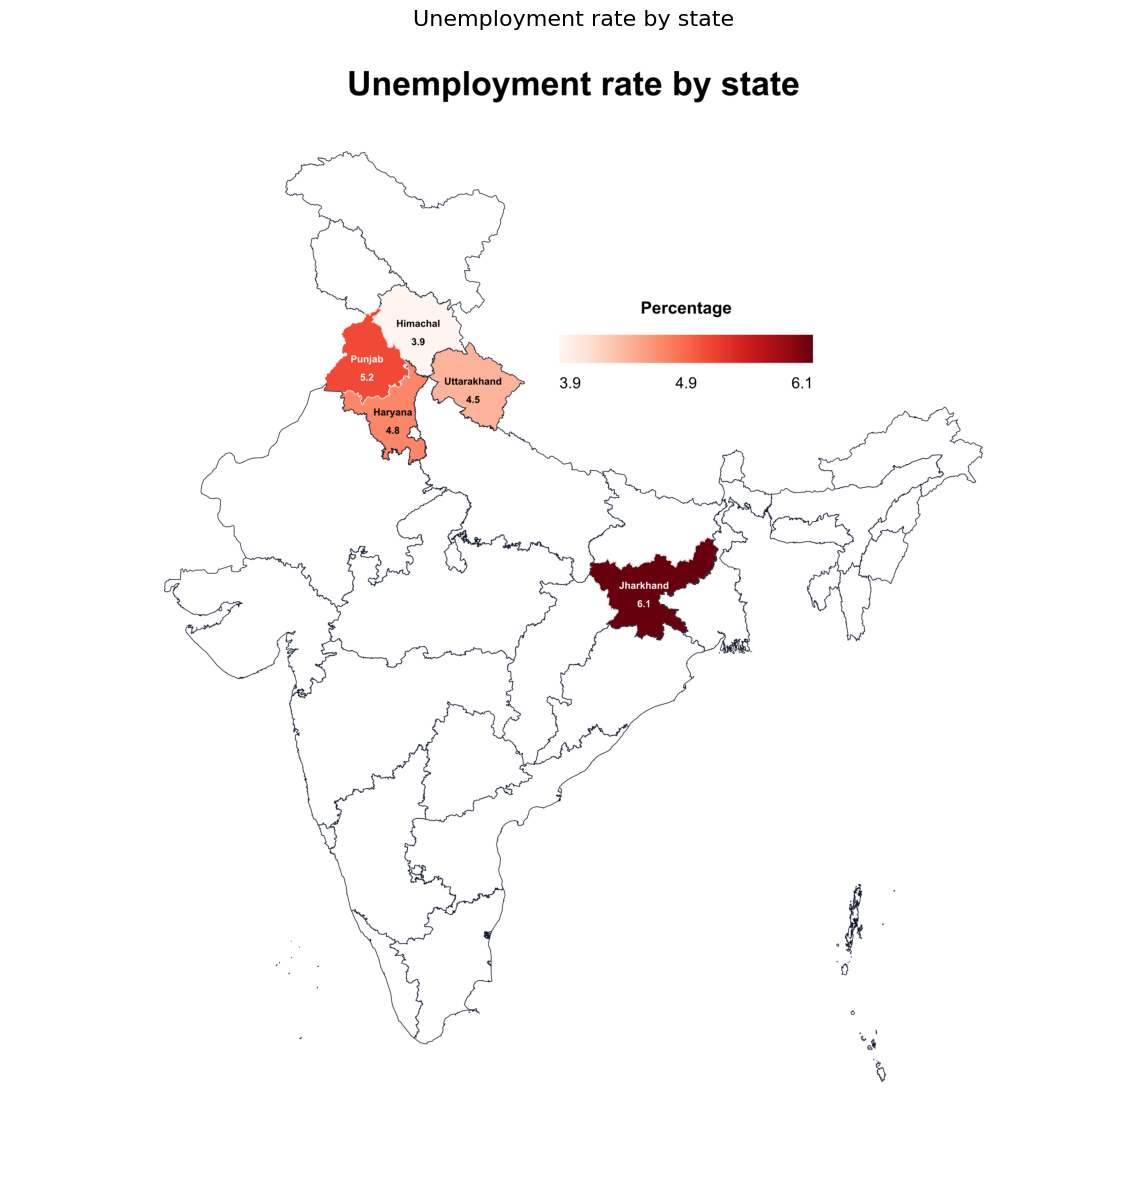

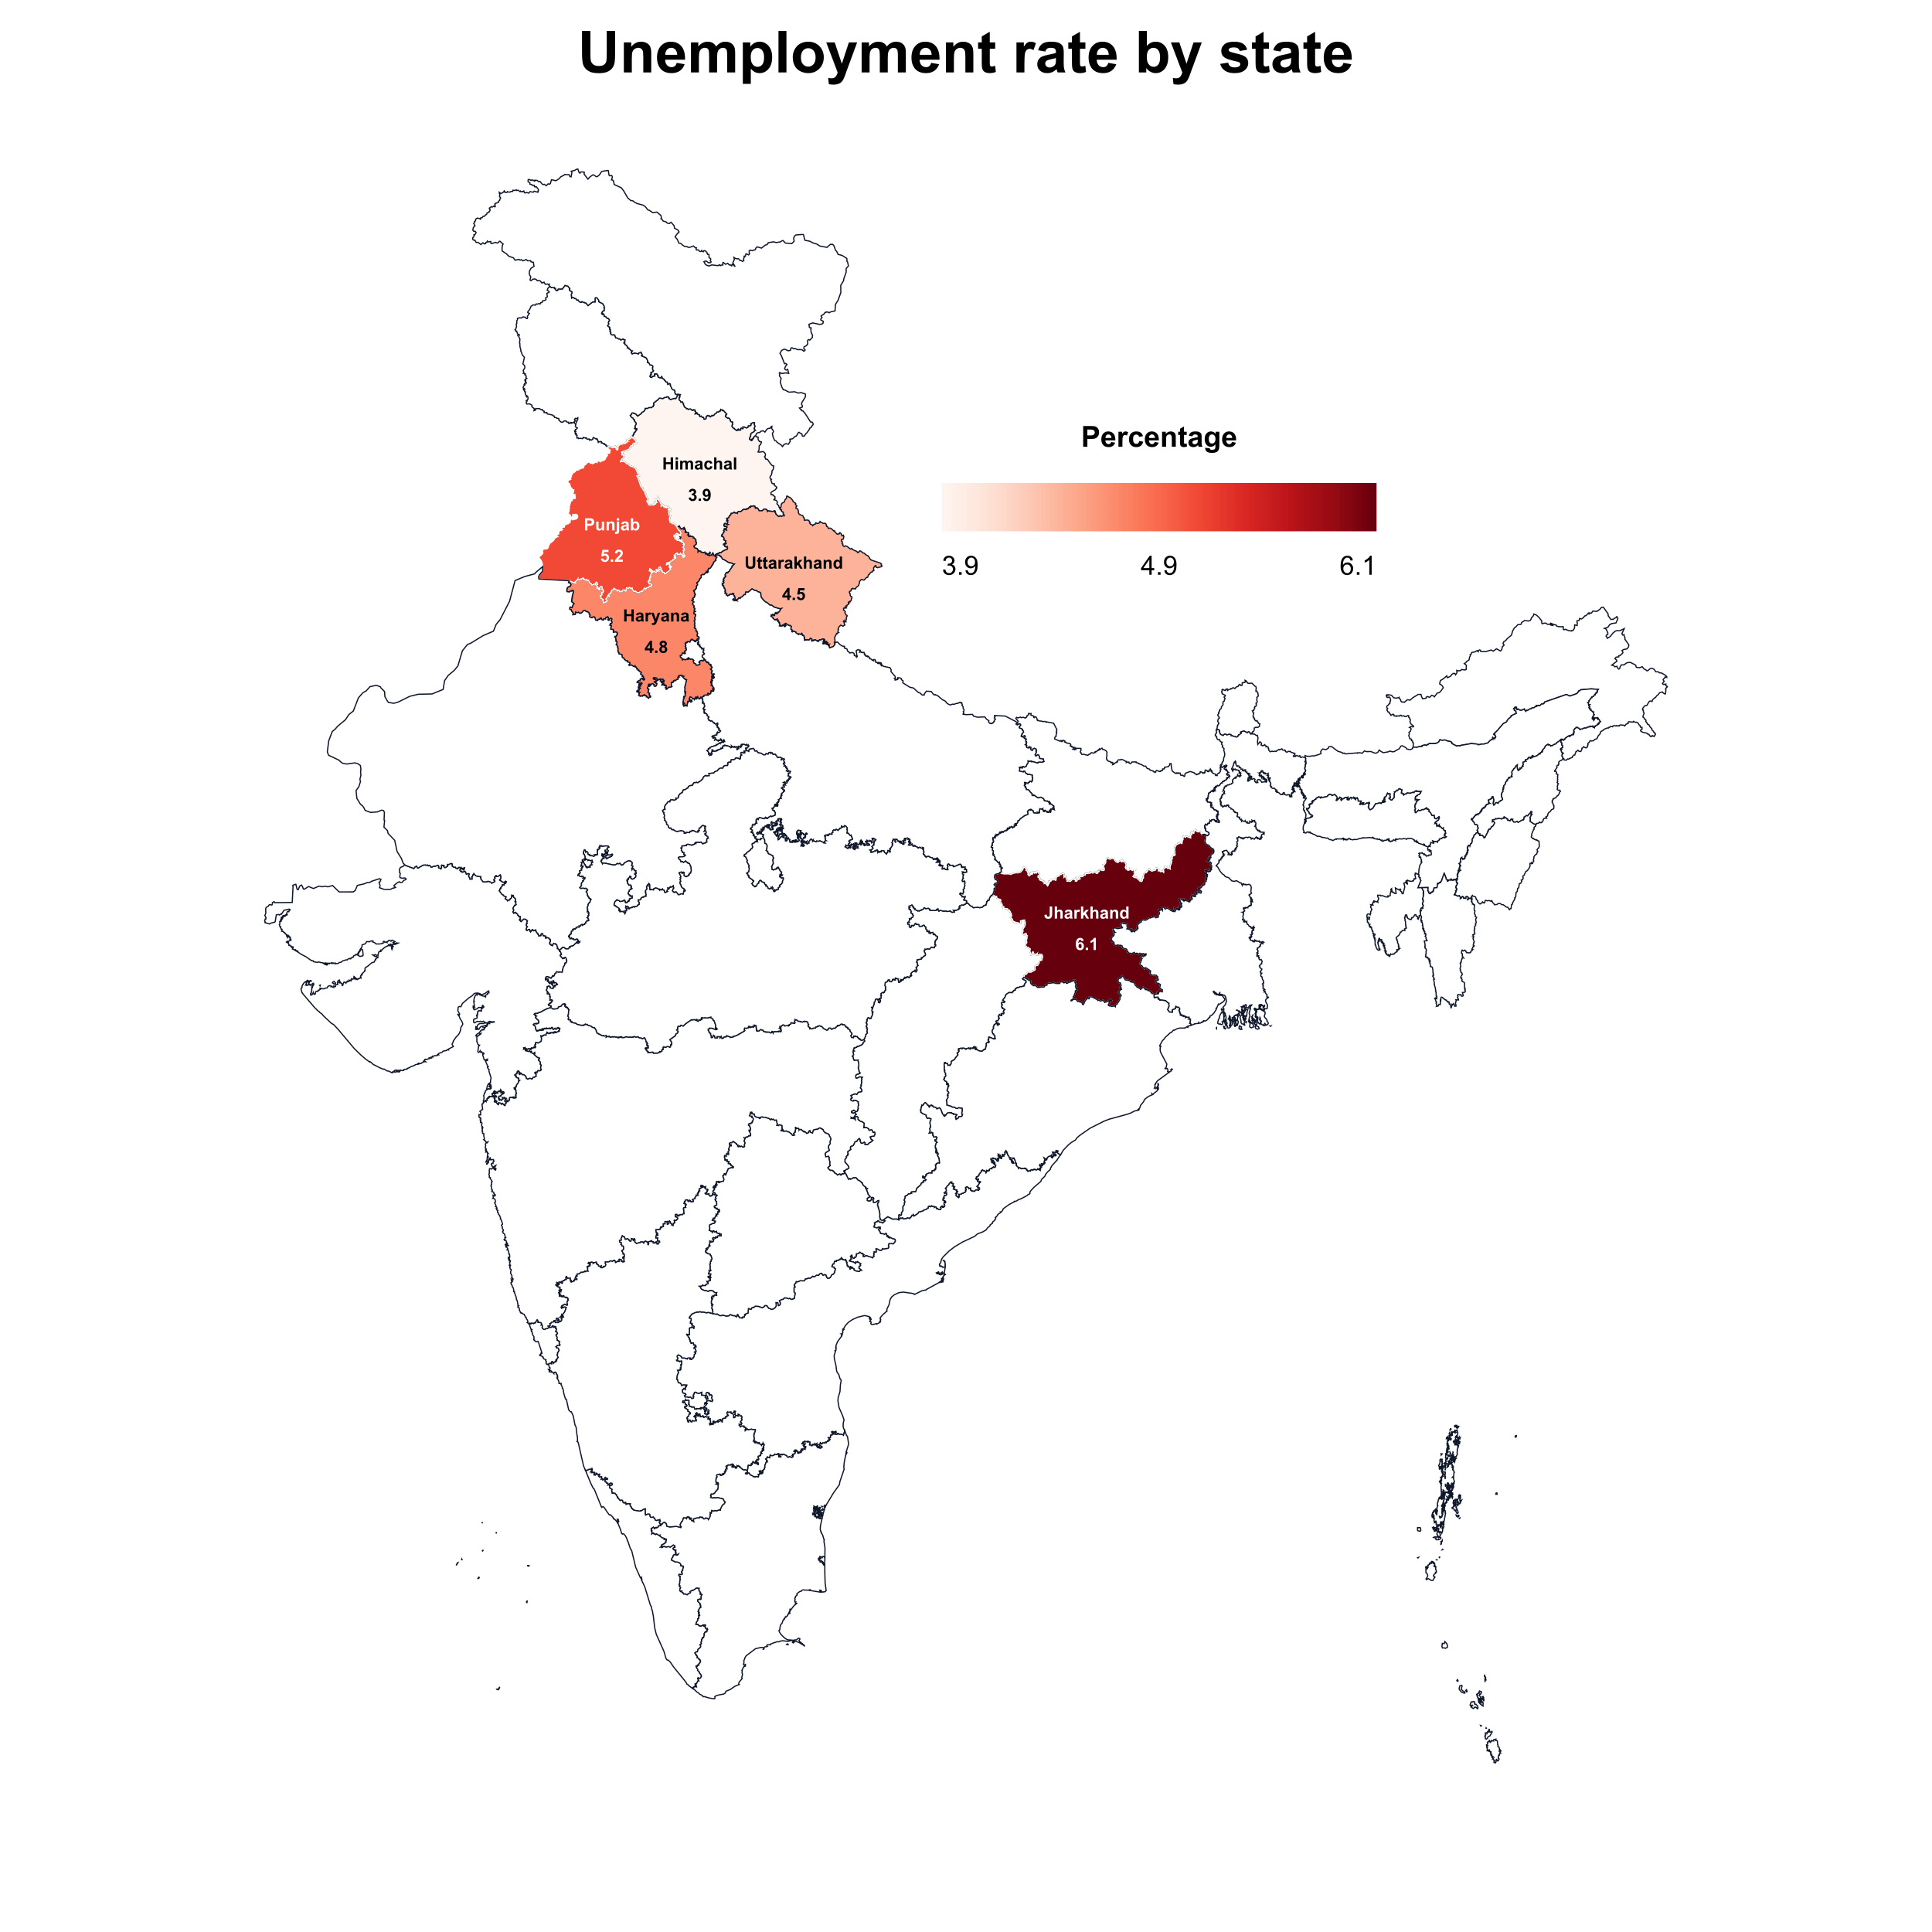

In [ ]:
# Dataframe with custom column names
custom_df = pd.DataFrame(
    {
        "state_name": [
            "Punjab",
            "Haryana",
            "Himachal Pradesh",
            "Uttarakhand",
            "Jharkhand",
        ],
        "unemployment_rate": [5.2, 4.8, 3.9, 4.5, 6.1],
    }
)

# Convert using helper function
data = BharatViz.from_dataframe(
    custom_df, state_col="state_name", value_col="unemployment_rate"
)

# Generate map
bv.generate_map(
    data,
    title="Unemployment rate by state",
    legend_title="Percentage",
    color_scale="reds",
    show=True,
)

## Compare color scales

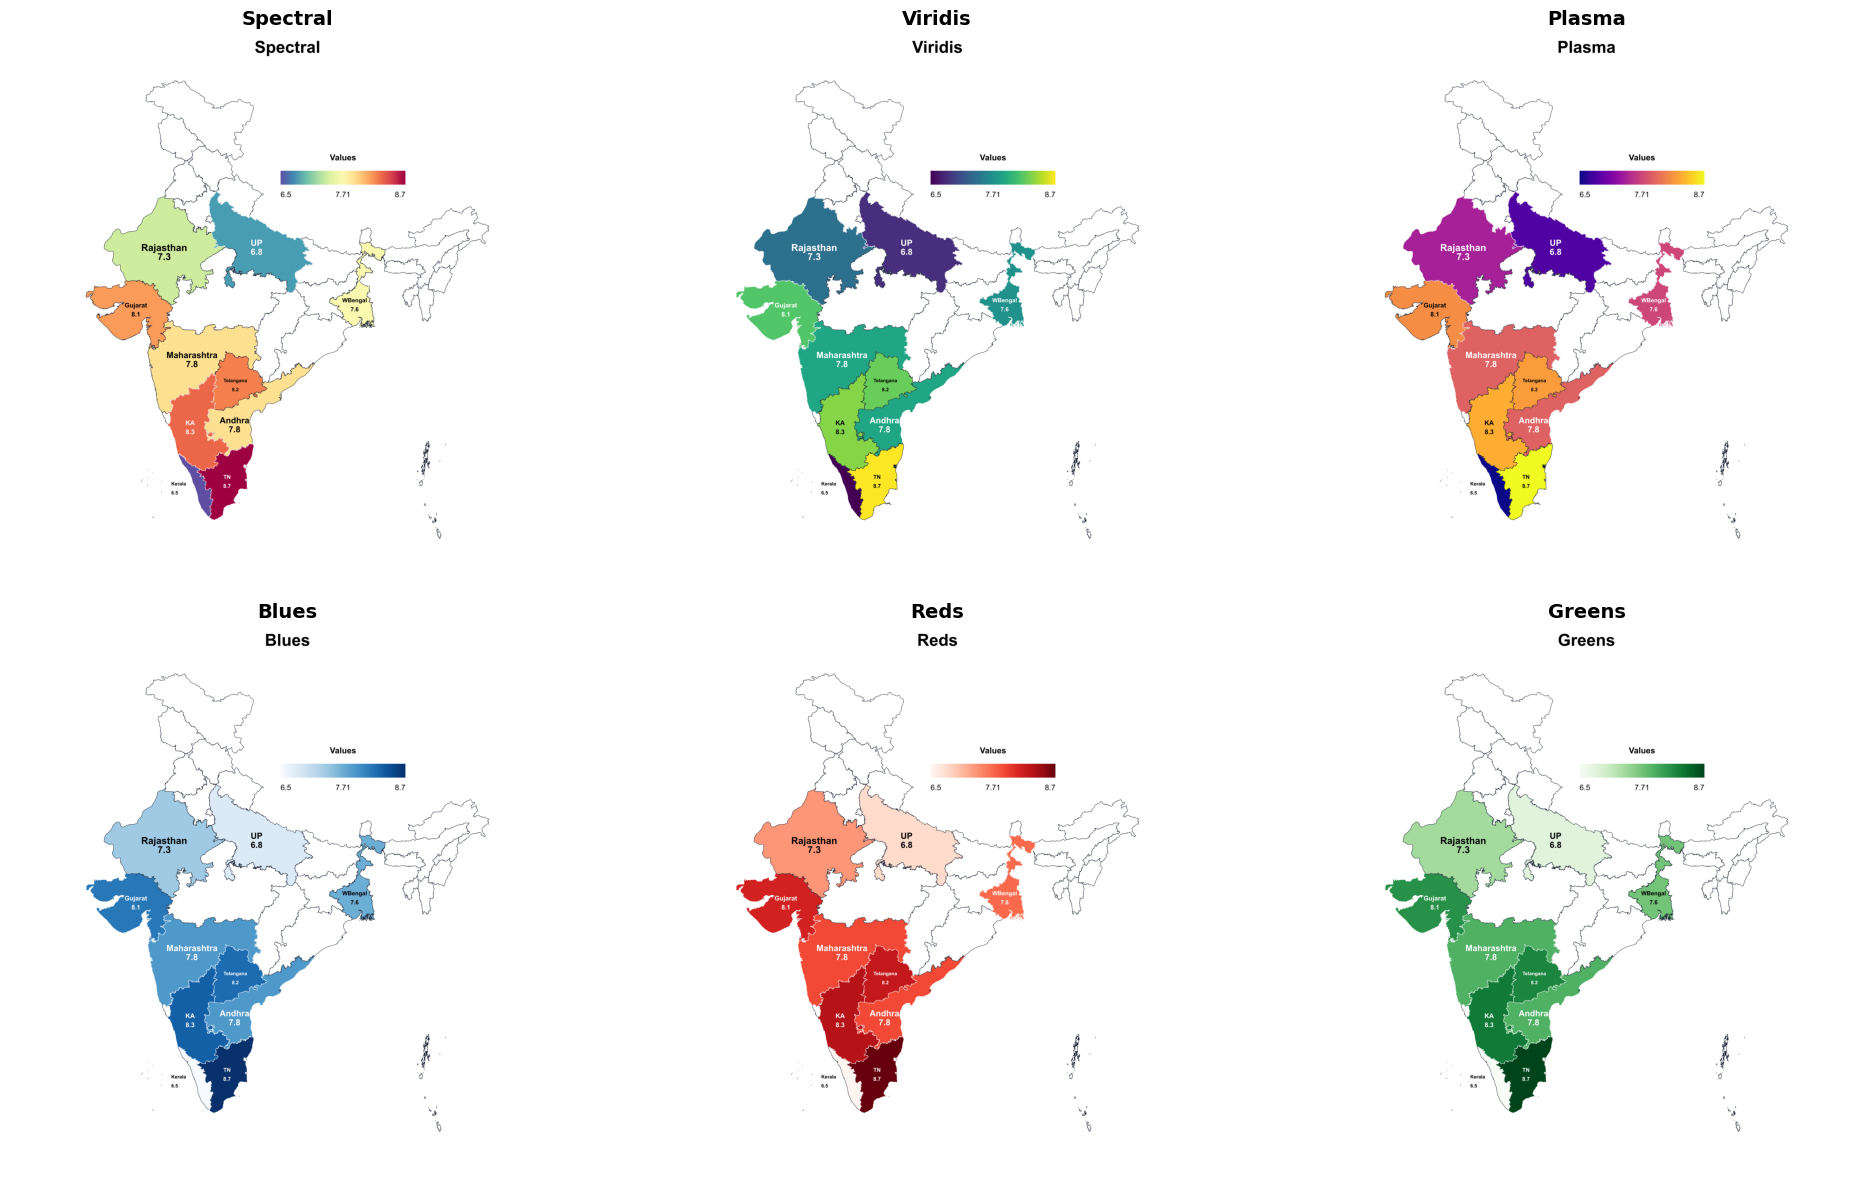

In [ ]:
# Compare multiple color scales side-by-side
bv.compare_scales(
    state_data,
    scales=["spectral", "viridis", "plasma", "blues", "reds", "greens"],
    figsize=(20, 12),
)

---

# District-level maps

Currently, BharatViz supports three different district maps:
- **[LGD](https://lgdirectory.gov.in/)**: Latest district boundaries (default)
- **NFHS5**: NFHS-5 survey boundaries
- **NFHS4**: NFHS-4 survey boundaries

## Quick district map

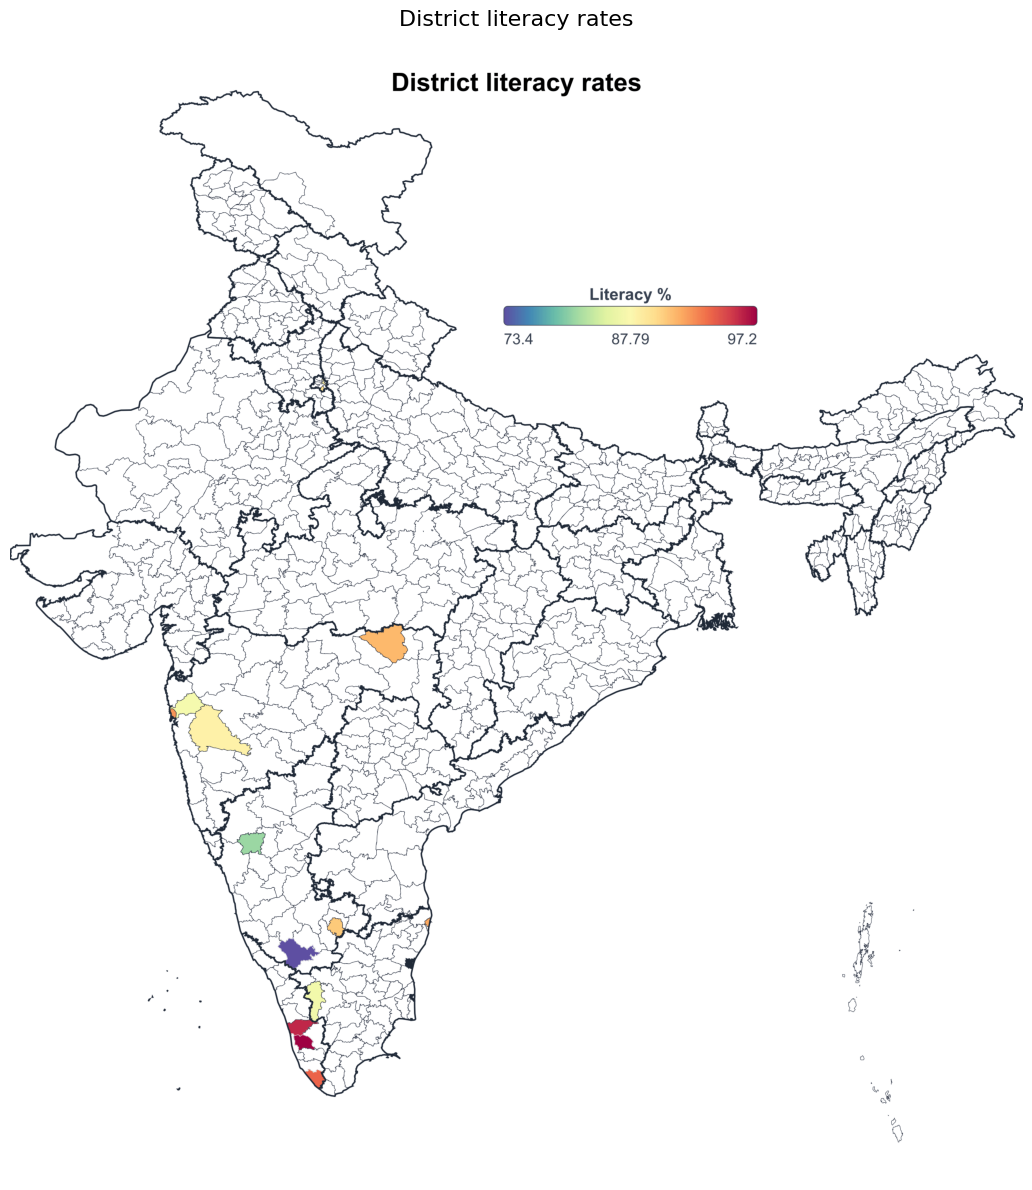

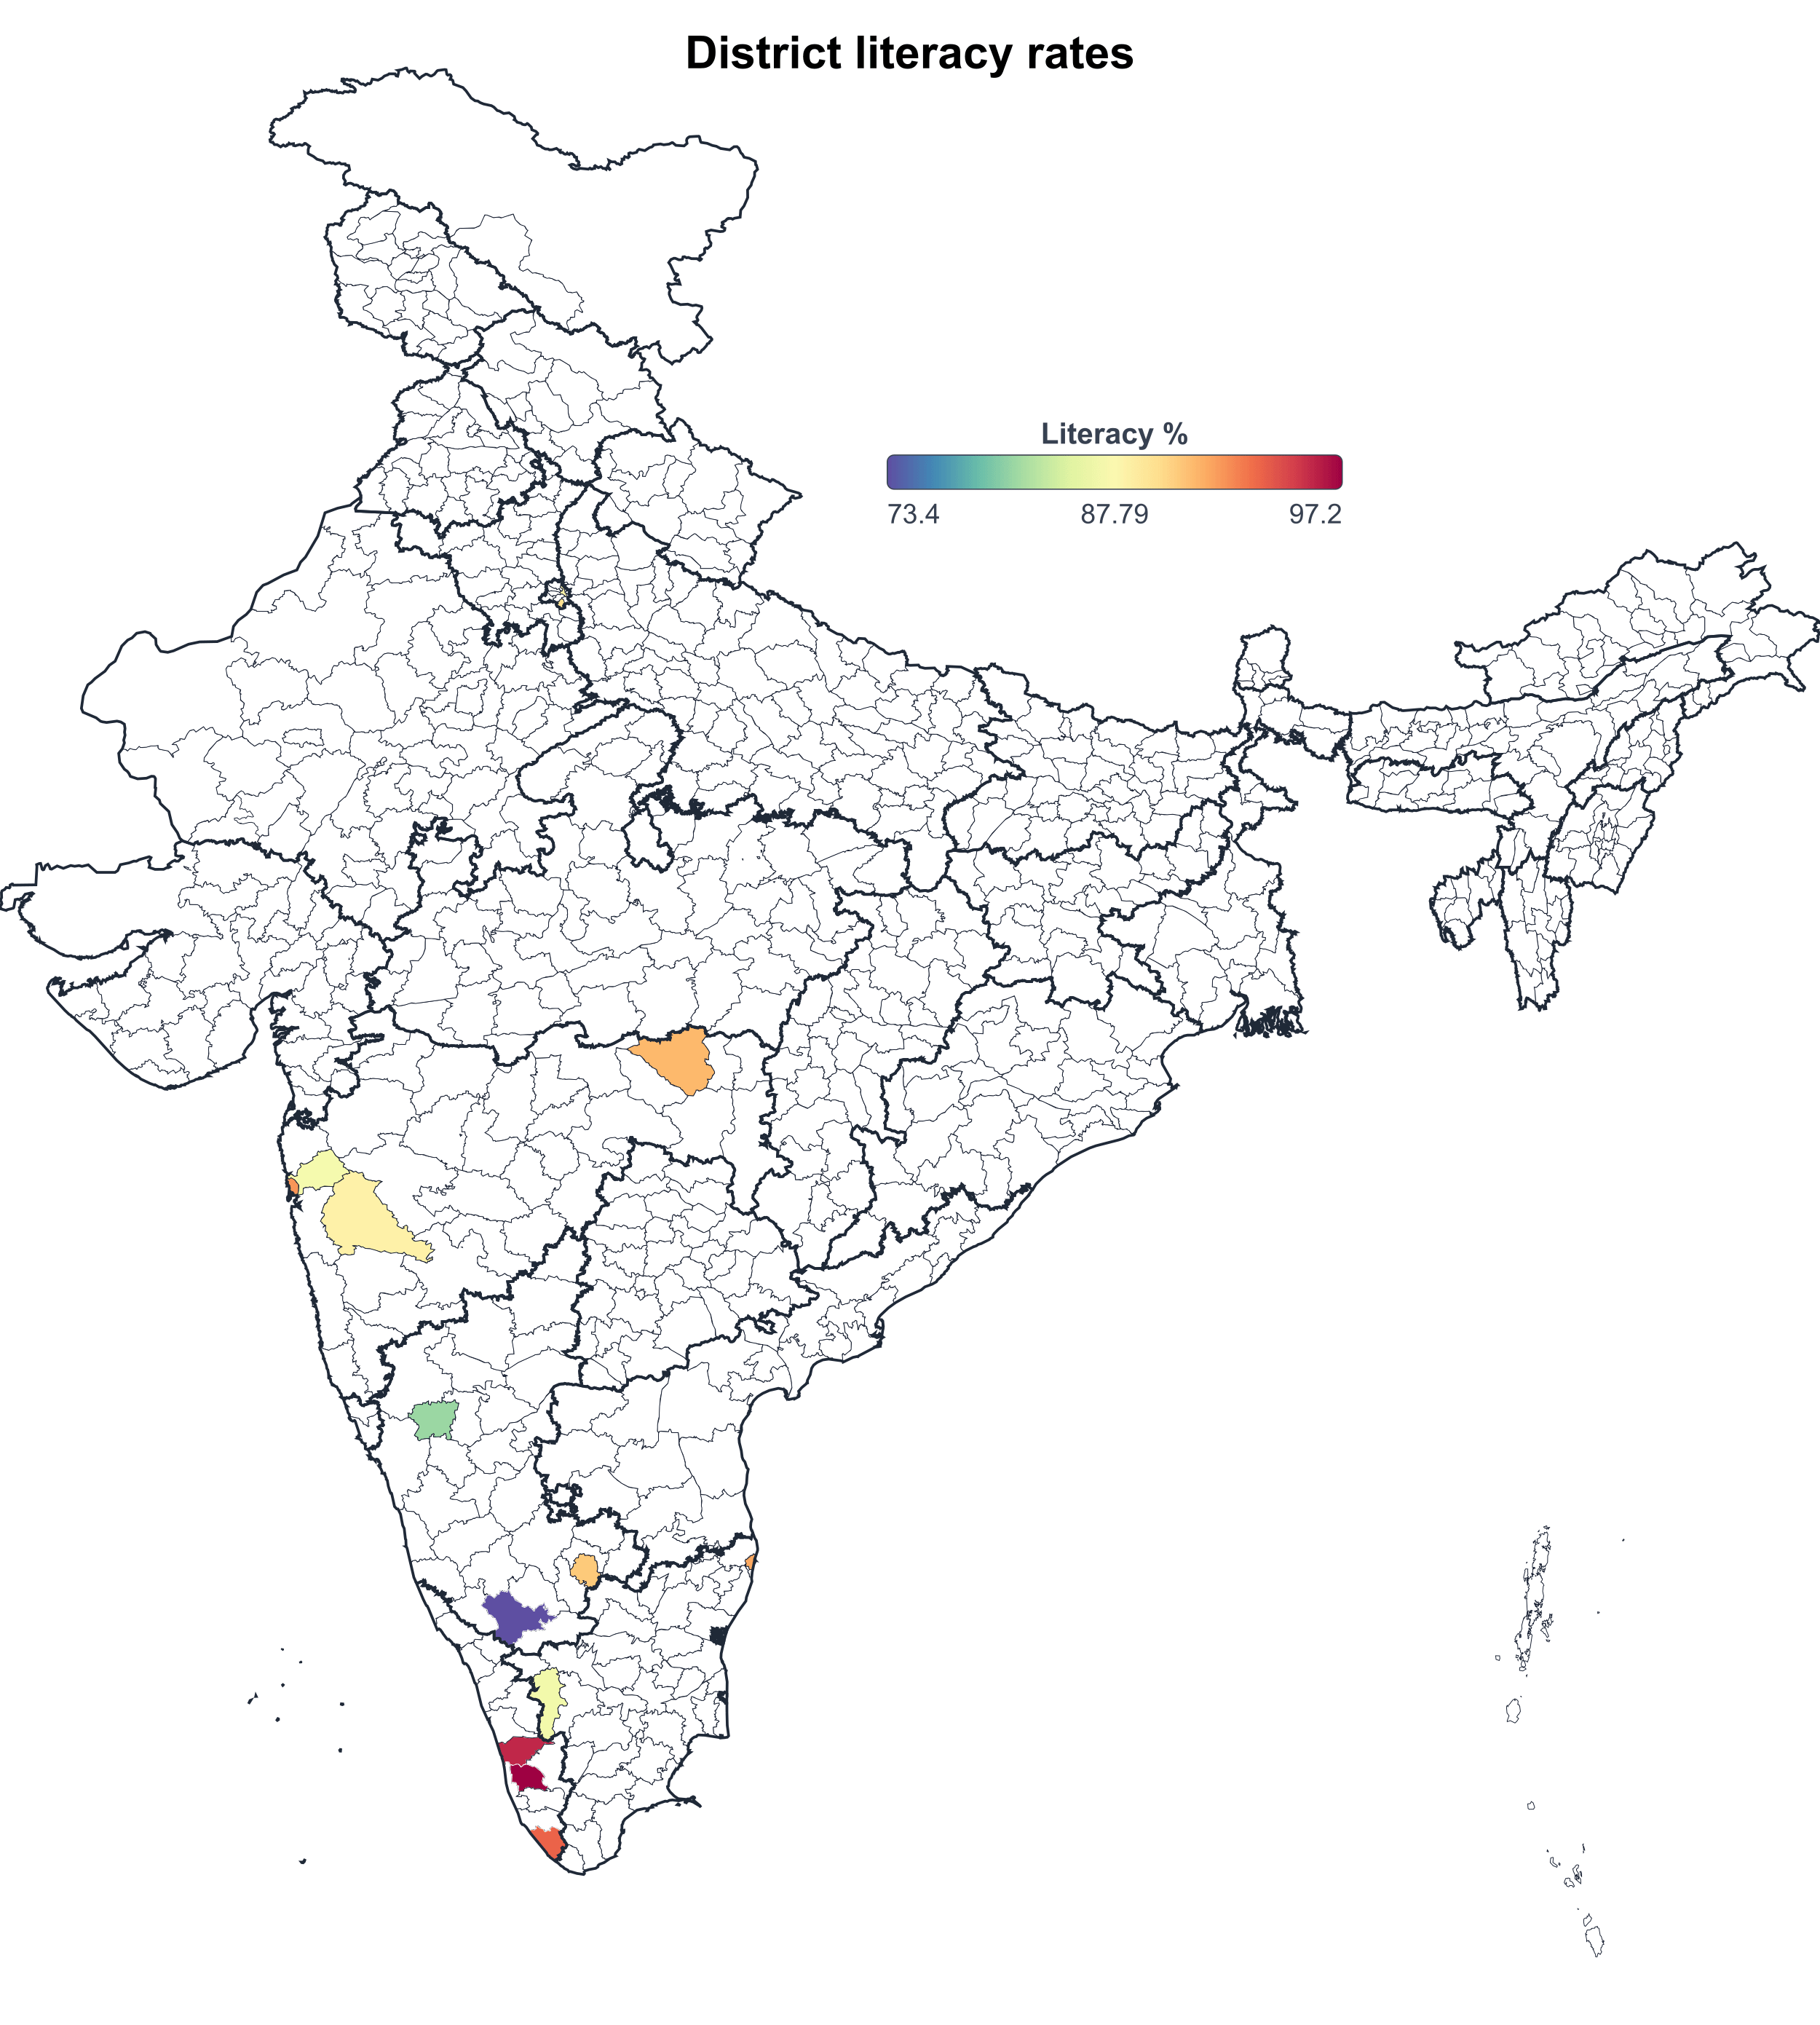

In [ ]:
# Sample district data
district_data = [
    {"state": "Maharashtra", "district": "Mumbai", "value": 89.7},
    {"state": "Maharashtra", "district": "Mumbai Suburban", "value": 90.9},
    {"state": "Maharashtra", "district": "Pune", "value": 86.2},
    {"state": "Maharashtra", "district": "Nagpur", "value": 89.5},
    {"state": "Maharashtra", "district": "Thane", "value": 84.5},
    {"state": "Karnataka", "district": "Bengaluru Urban", "value": 88.7},
    {"state": "Karnataka", "district": "Mysuru", "value": 73.4},
    {"state": "Karnataka", "district": "Dharwad", "value": 80.0},
    {"state": "Kerala", "district": "Thiruvananthapuram", "value": 93.0},
    {"state": "Kerala", "district": "Kottayam", "value": 97.2},
    {"state": "Kerala", "district": "Ernakulam", "value": 95.7},
    {"state": "Tamil Nadu", "district": "Chennai", "value": 90.2},
    {"state": "Tamil Nadu", "district": "Coimbatore", "value": 84.2},
    {"state": "Delhi", "district": "Central", "value": 86.3},
    {"state": "Delhi", "district": "South", "value": 87.4},
]

# Display using quick function
quick_districts_map(
    district_data,
    title="District literacy rates",
    legend_title="Literacy %",
    color_scale="spectral",
    map_type="LGD",
    api_url=API_URL,
)

## Districts from dataframe

         state            district  value
0  Maharashtra              Mumbai   89.7
1  Maharashtra                Pune   86.2
2    Karnataka     Bengaluru Urban   88.7
3    Karnataka              Mysuru   73.4
4       Kerala  Thiruvananthapuram   93.0
5       Kerala            Kottayam   97.2


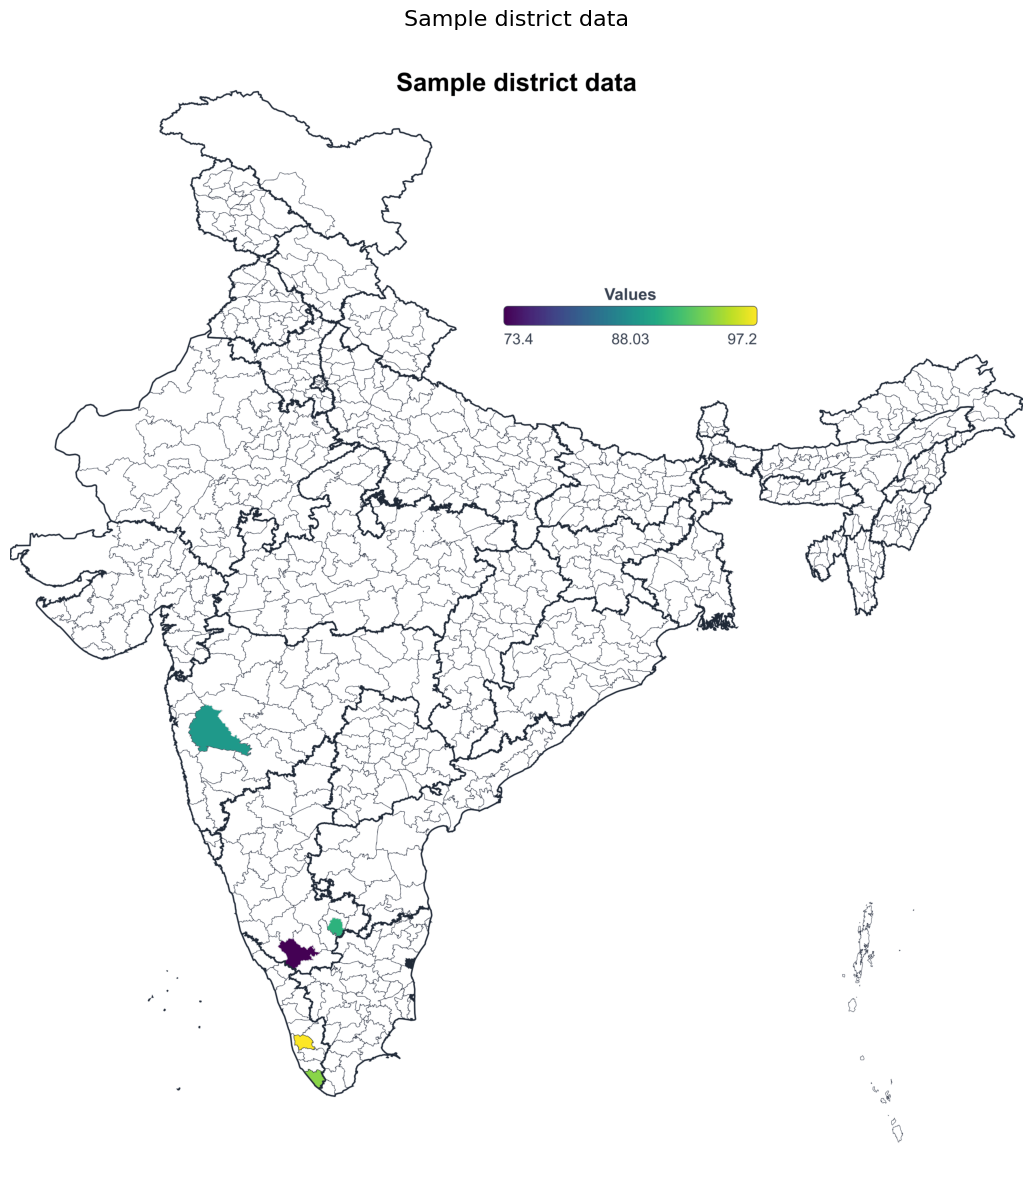

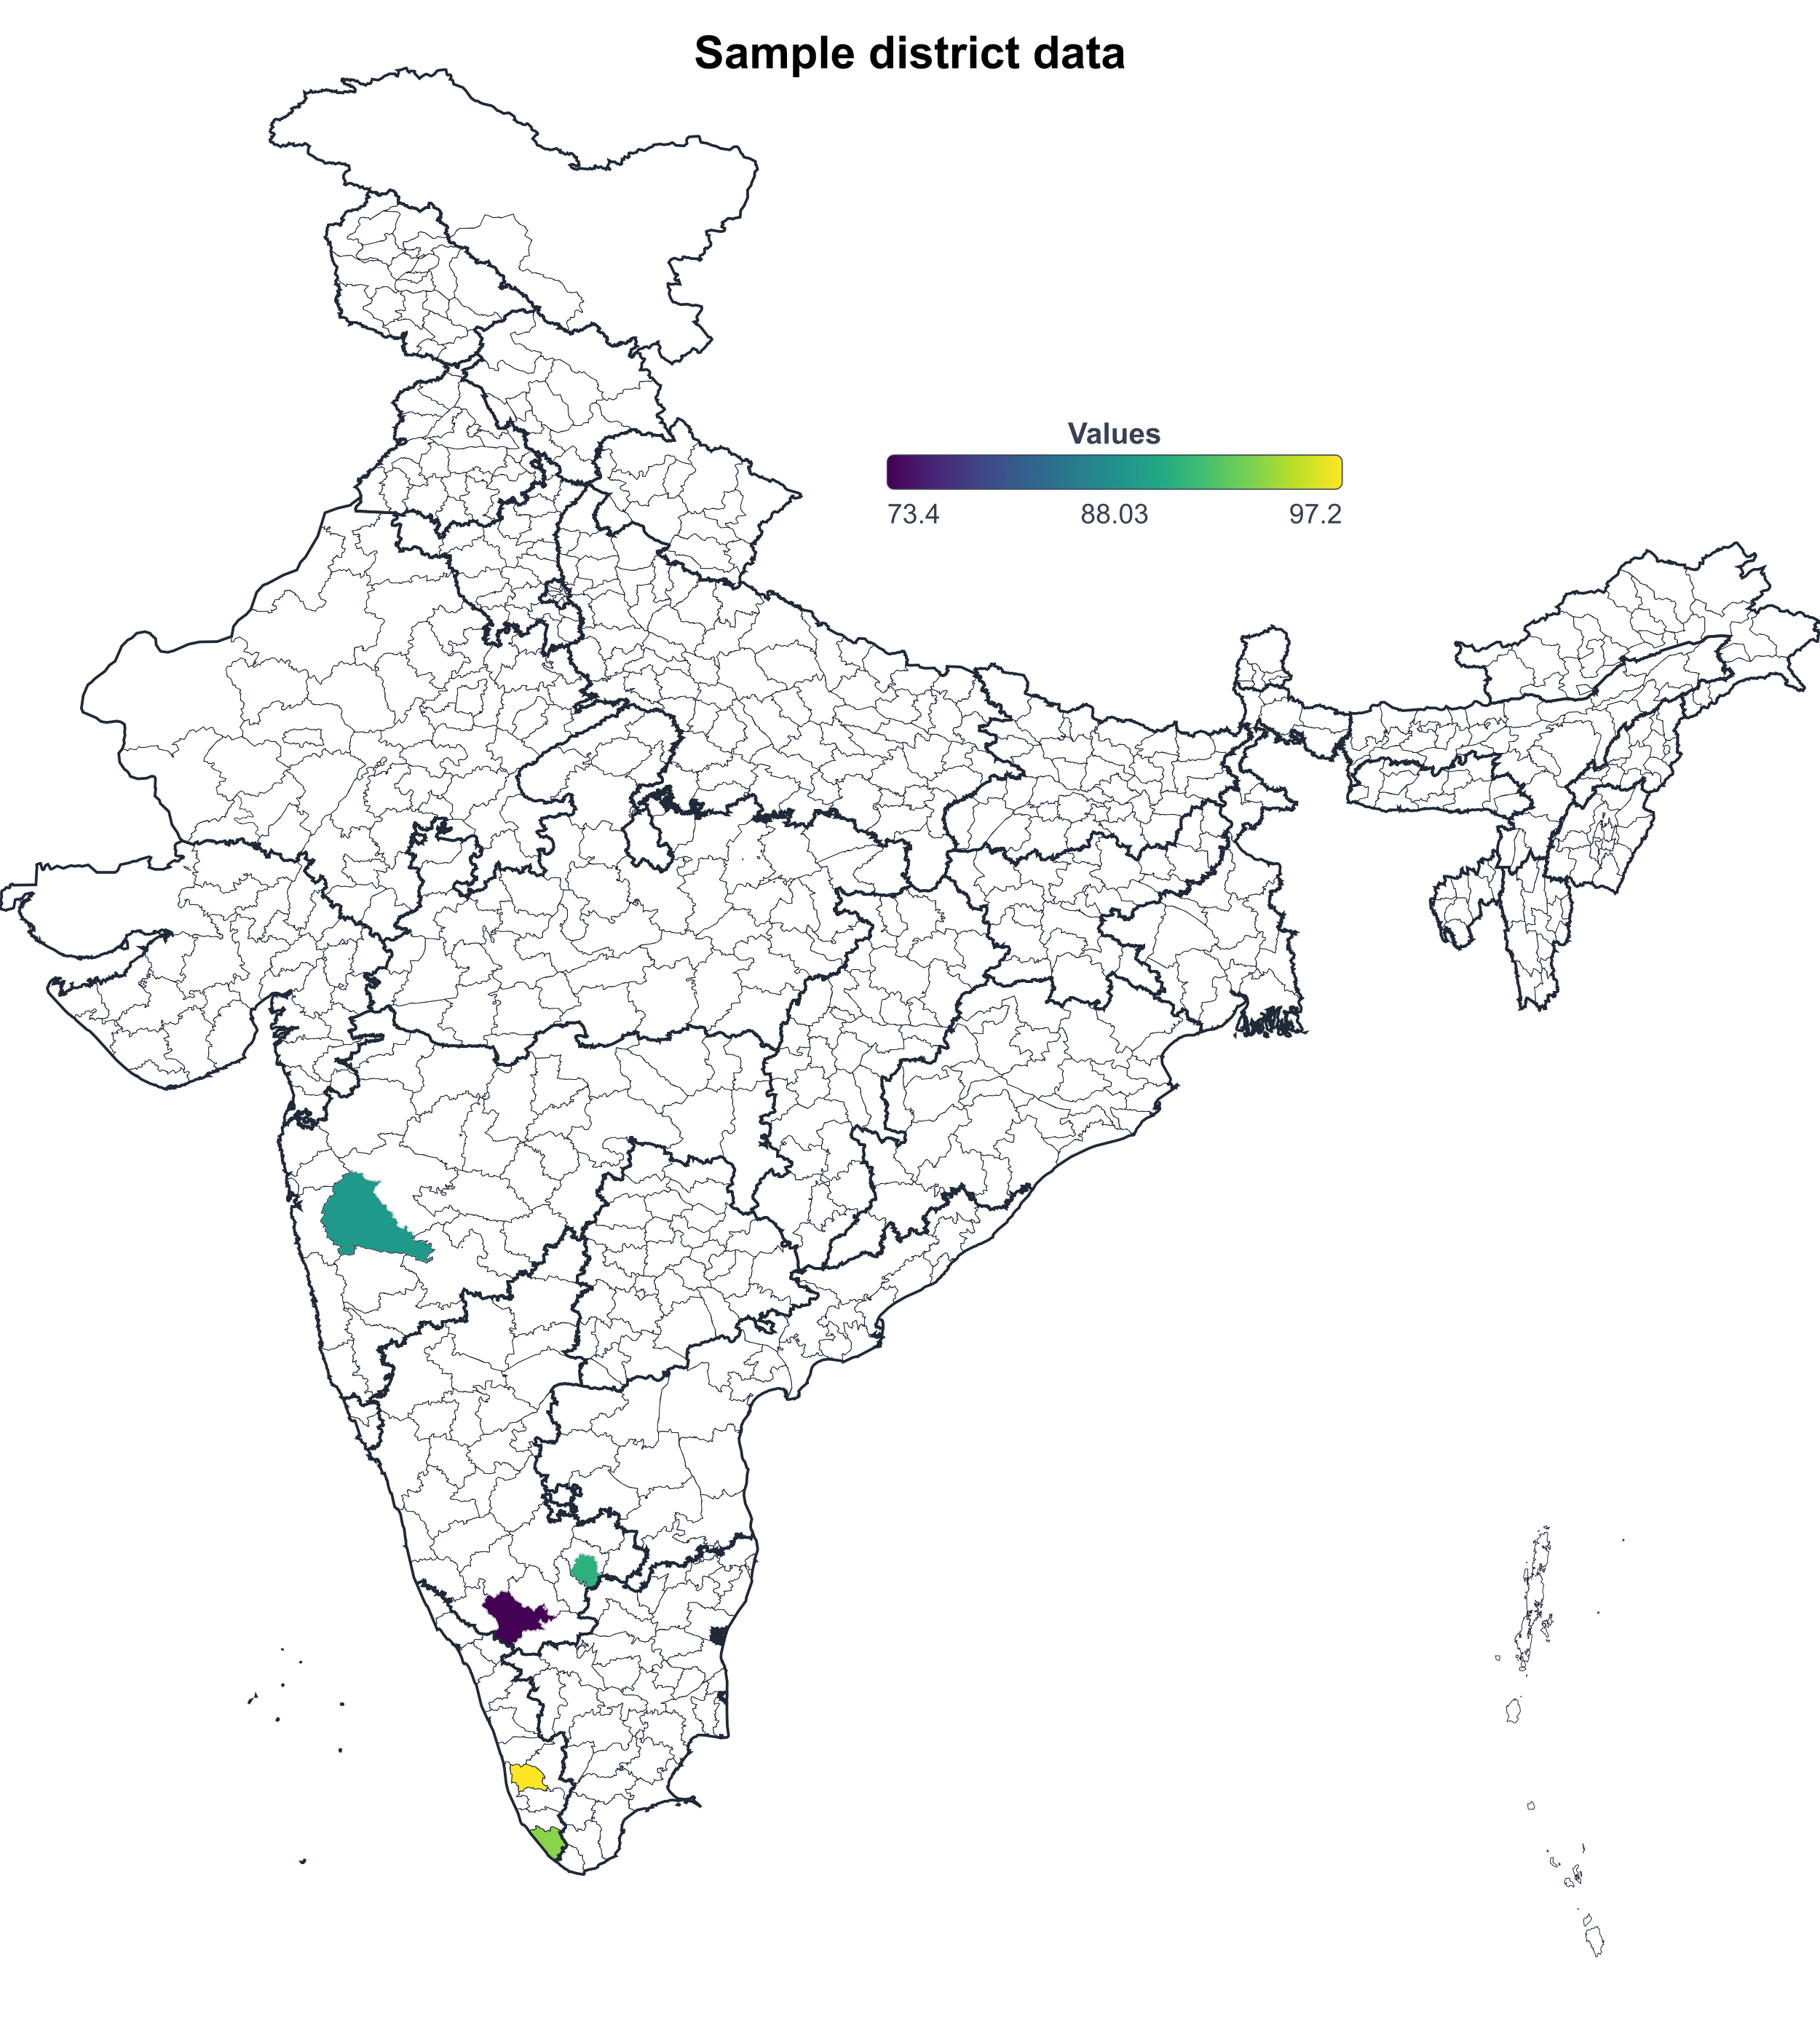

In [ ]:
# Create district dataframe
districts_df = pd.DataFrame(
    {
        "state": [
            "Maharashtra",
            "Maharashtra",
            "Karnataka",
            "Karnataka",
            "Kerala",
            "Kerala",
        ],
        "district": [
            "Mumbai",
            "Pune",
            "Bengaluru Urban",
            "Mysuru",
            "Thiruvananthapuram",
            "Kottayam",
        ],
        "value": [89.7, 86.2, 88.7, 73.4, 93.0, 97.2],
    }
)

print(districts_df)

# Generate districts map - dataframe is auto-converted!
bv.generate_districts_map(
    districts_df,
    map_type="LGD",
    title="Sample district data",
    legend_title="Values",
    color_scale="viridis",
    show_state_boundaries=True,
    show=True,
)

## Different district map types (LGD vs NFHS)

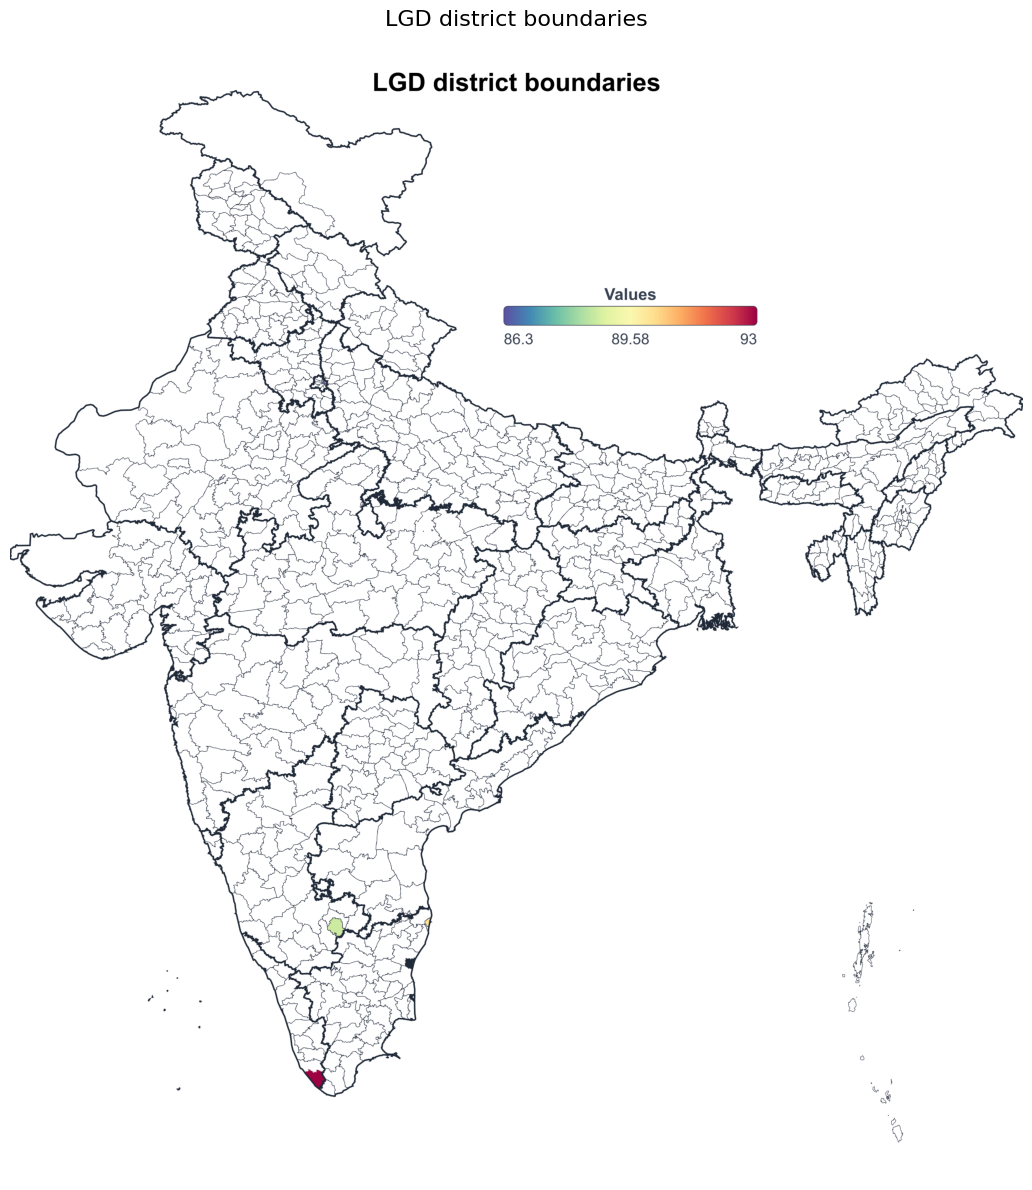


Generating NFHS5 map...


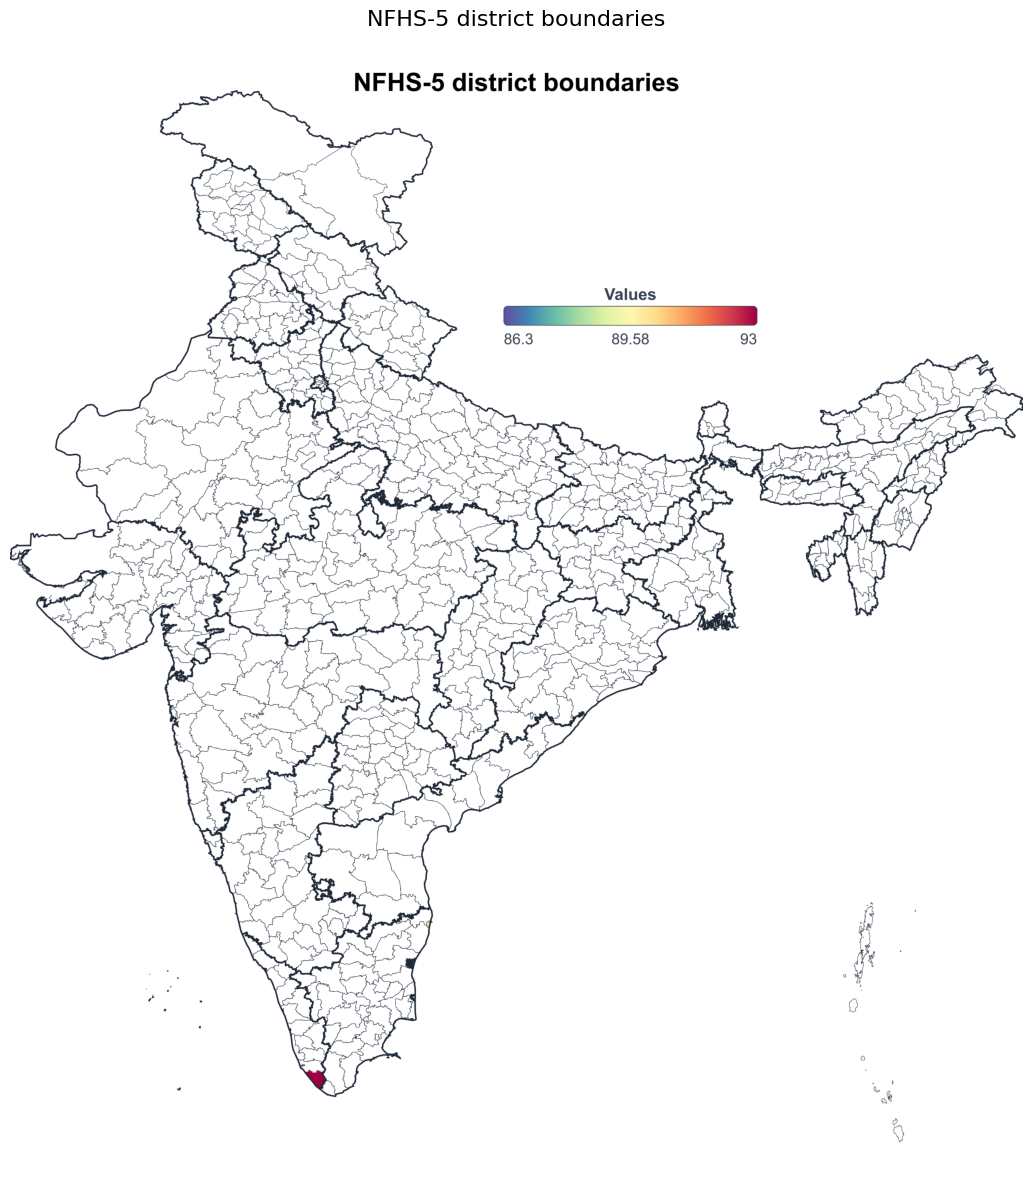

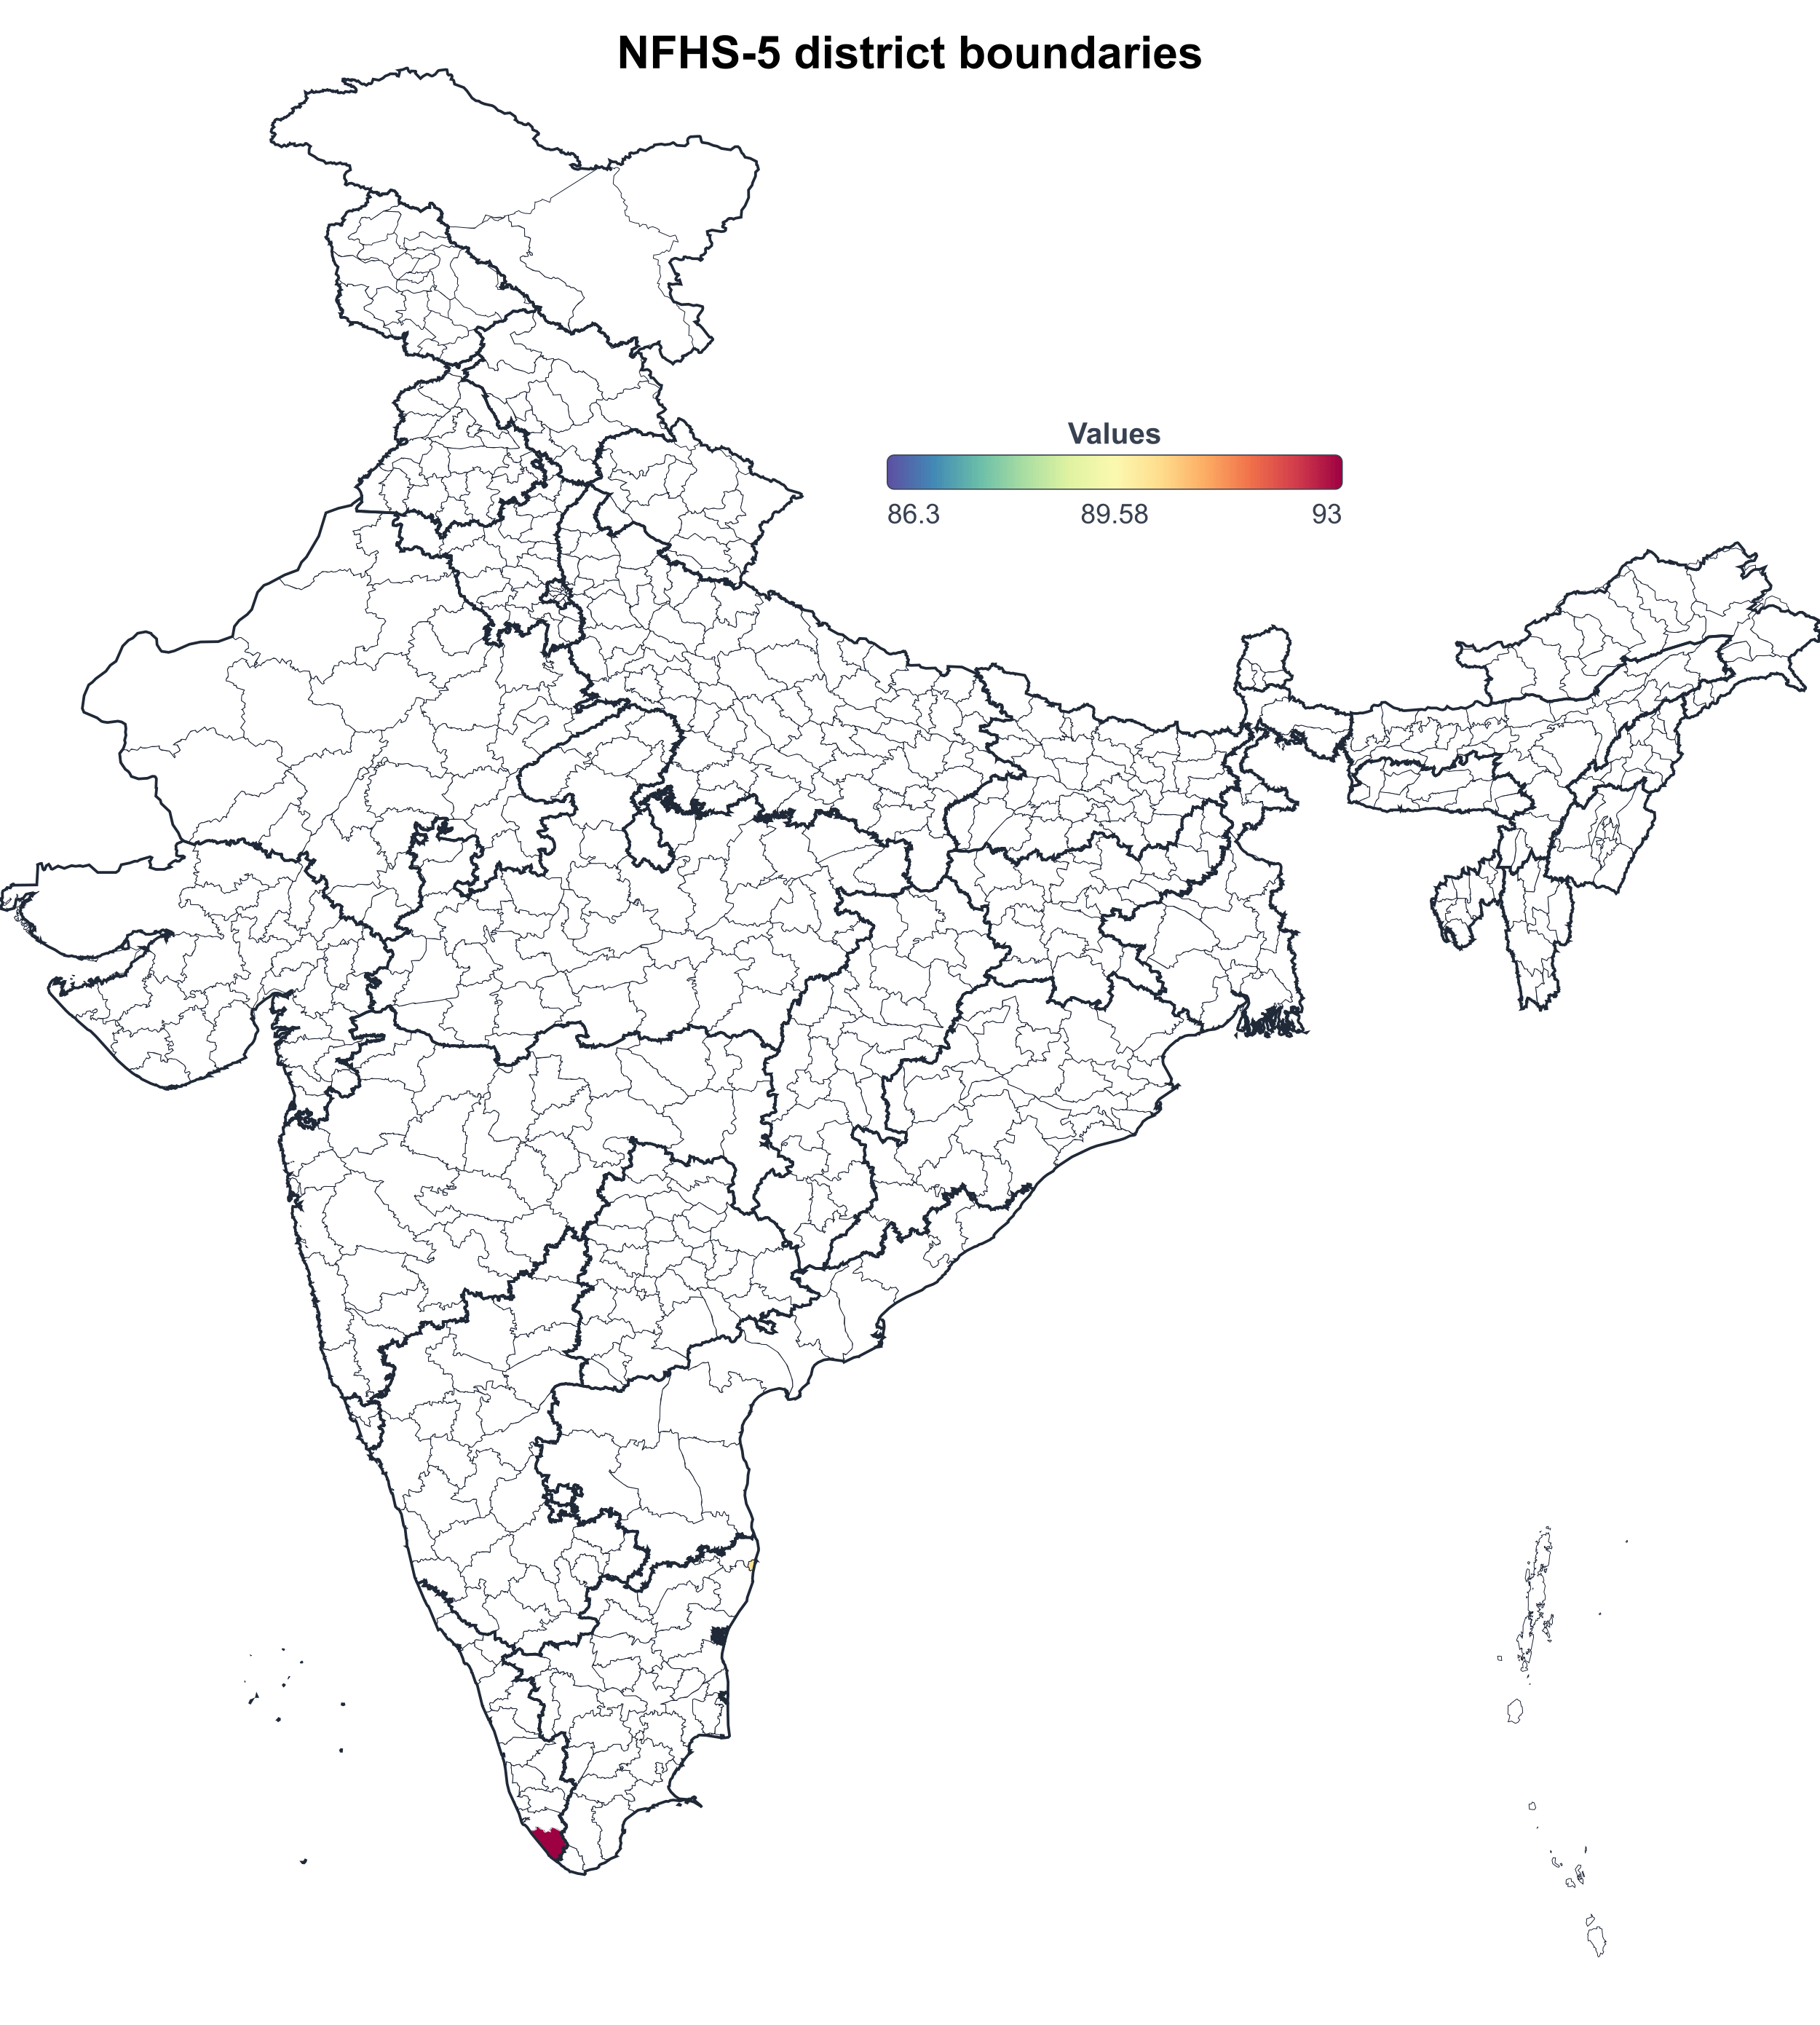

In [ ]:
# Same data, different boundary definitions (names)
sample_districts = [
    {"state": "Maharashtra", "district": "Mumbai", "value": 89.7},
    {"state": "Karnataka", "district": "Bengaluru Urban", "value": 88.7},
    {"state": "Kerala", "district": "Thiruvananthapuram", "value": 93.0},
    {"state": "Tamil Nadu", "district": "Chennai", "value": 90.2},
    {"state": "Delhi", "district": "Central", "value": 86.3},
]


bv.generate_districts_map(
    sample_districts, map_type="LGD", title="LGD district boundaries", show=True
)

# Generate with NFHS5 boundaries
print("\nGenerating NFHS5 map...")
bv.generate_districts_map(
    sample_districts, map_type="NFHS5", title="NFHS-5 district boundaries", show=True
)

## Custom column names for districts

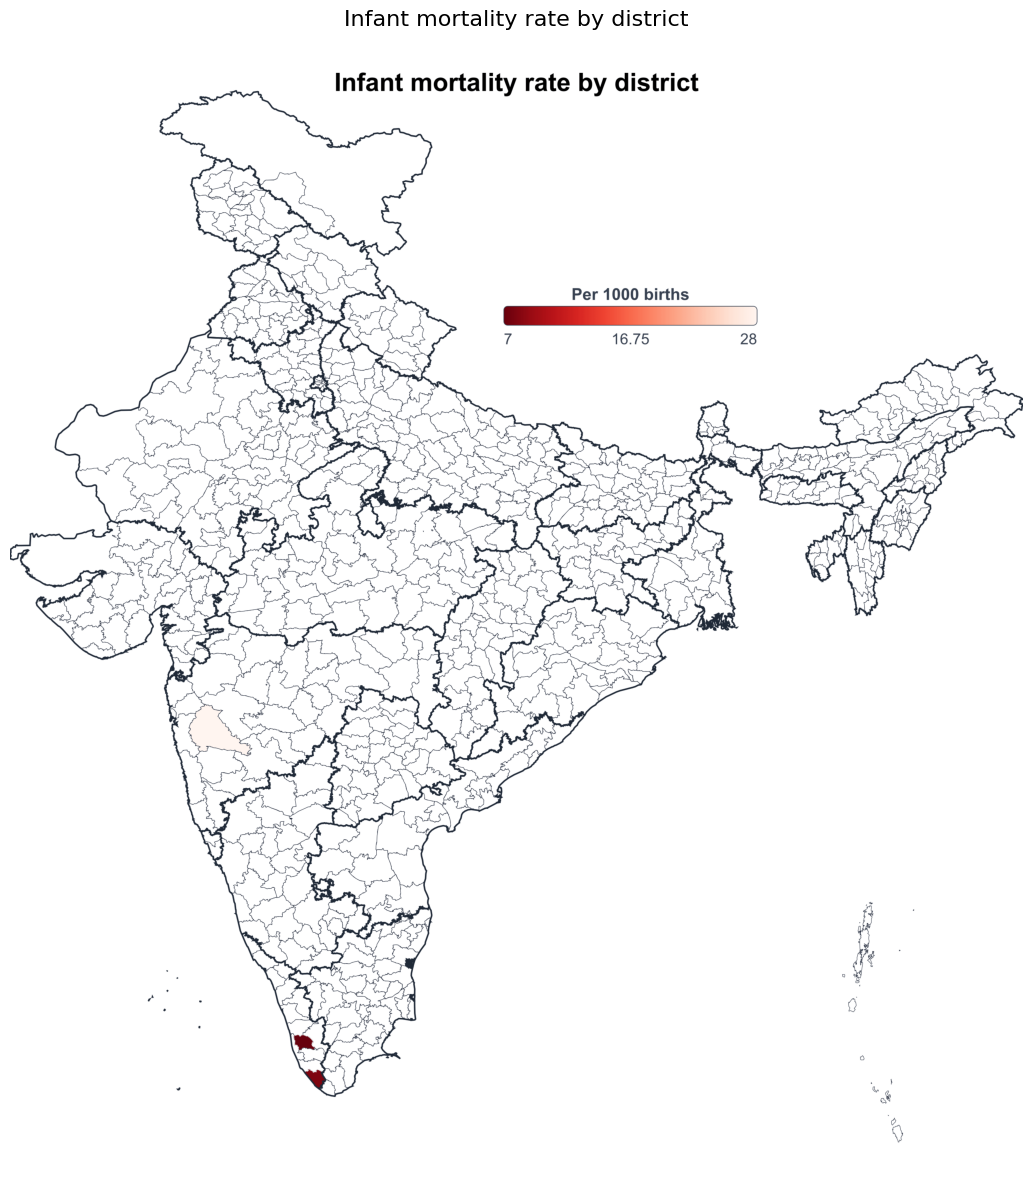

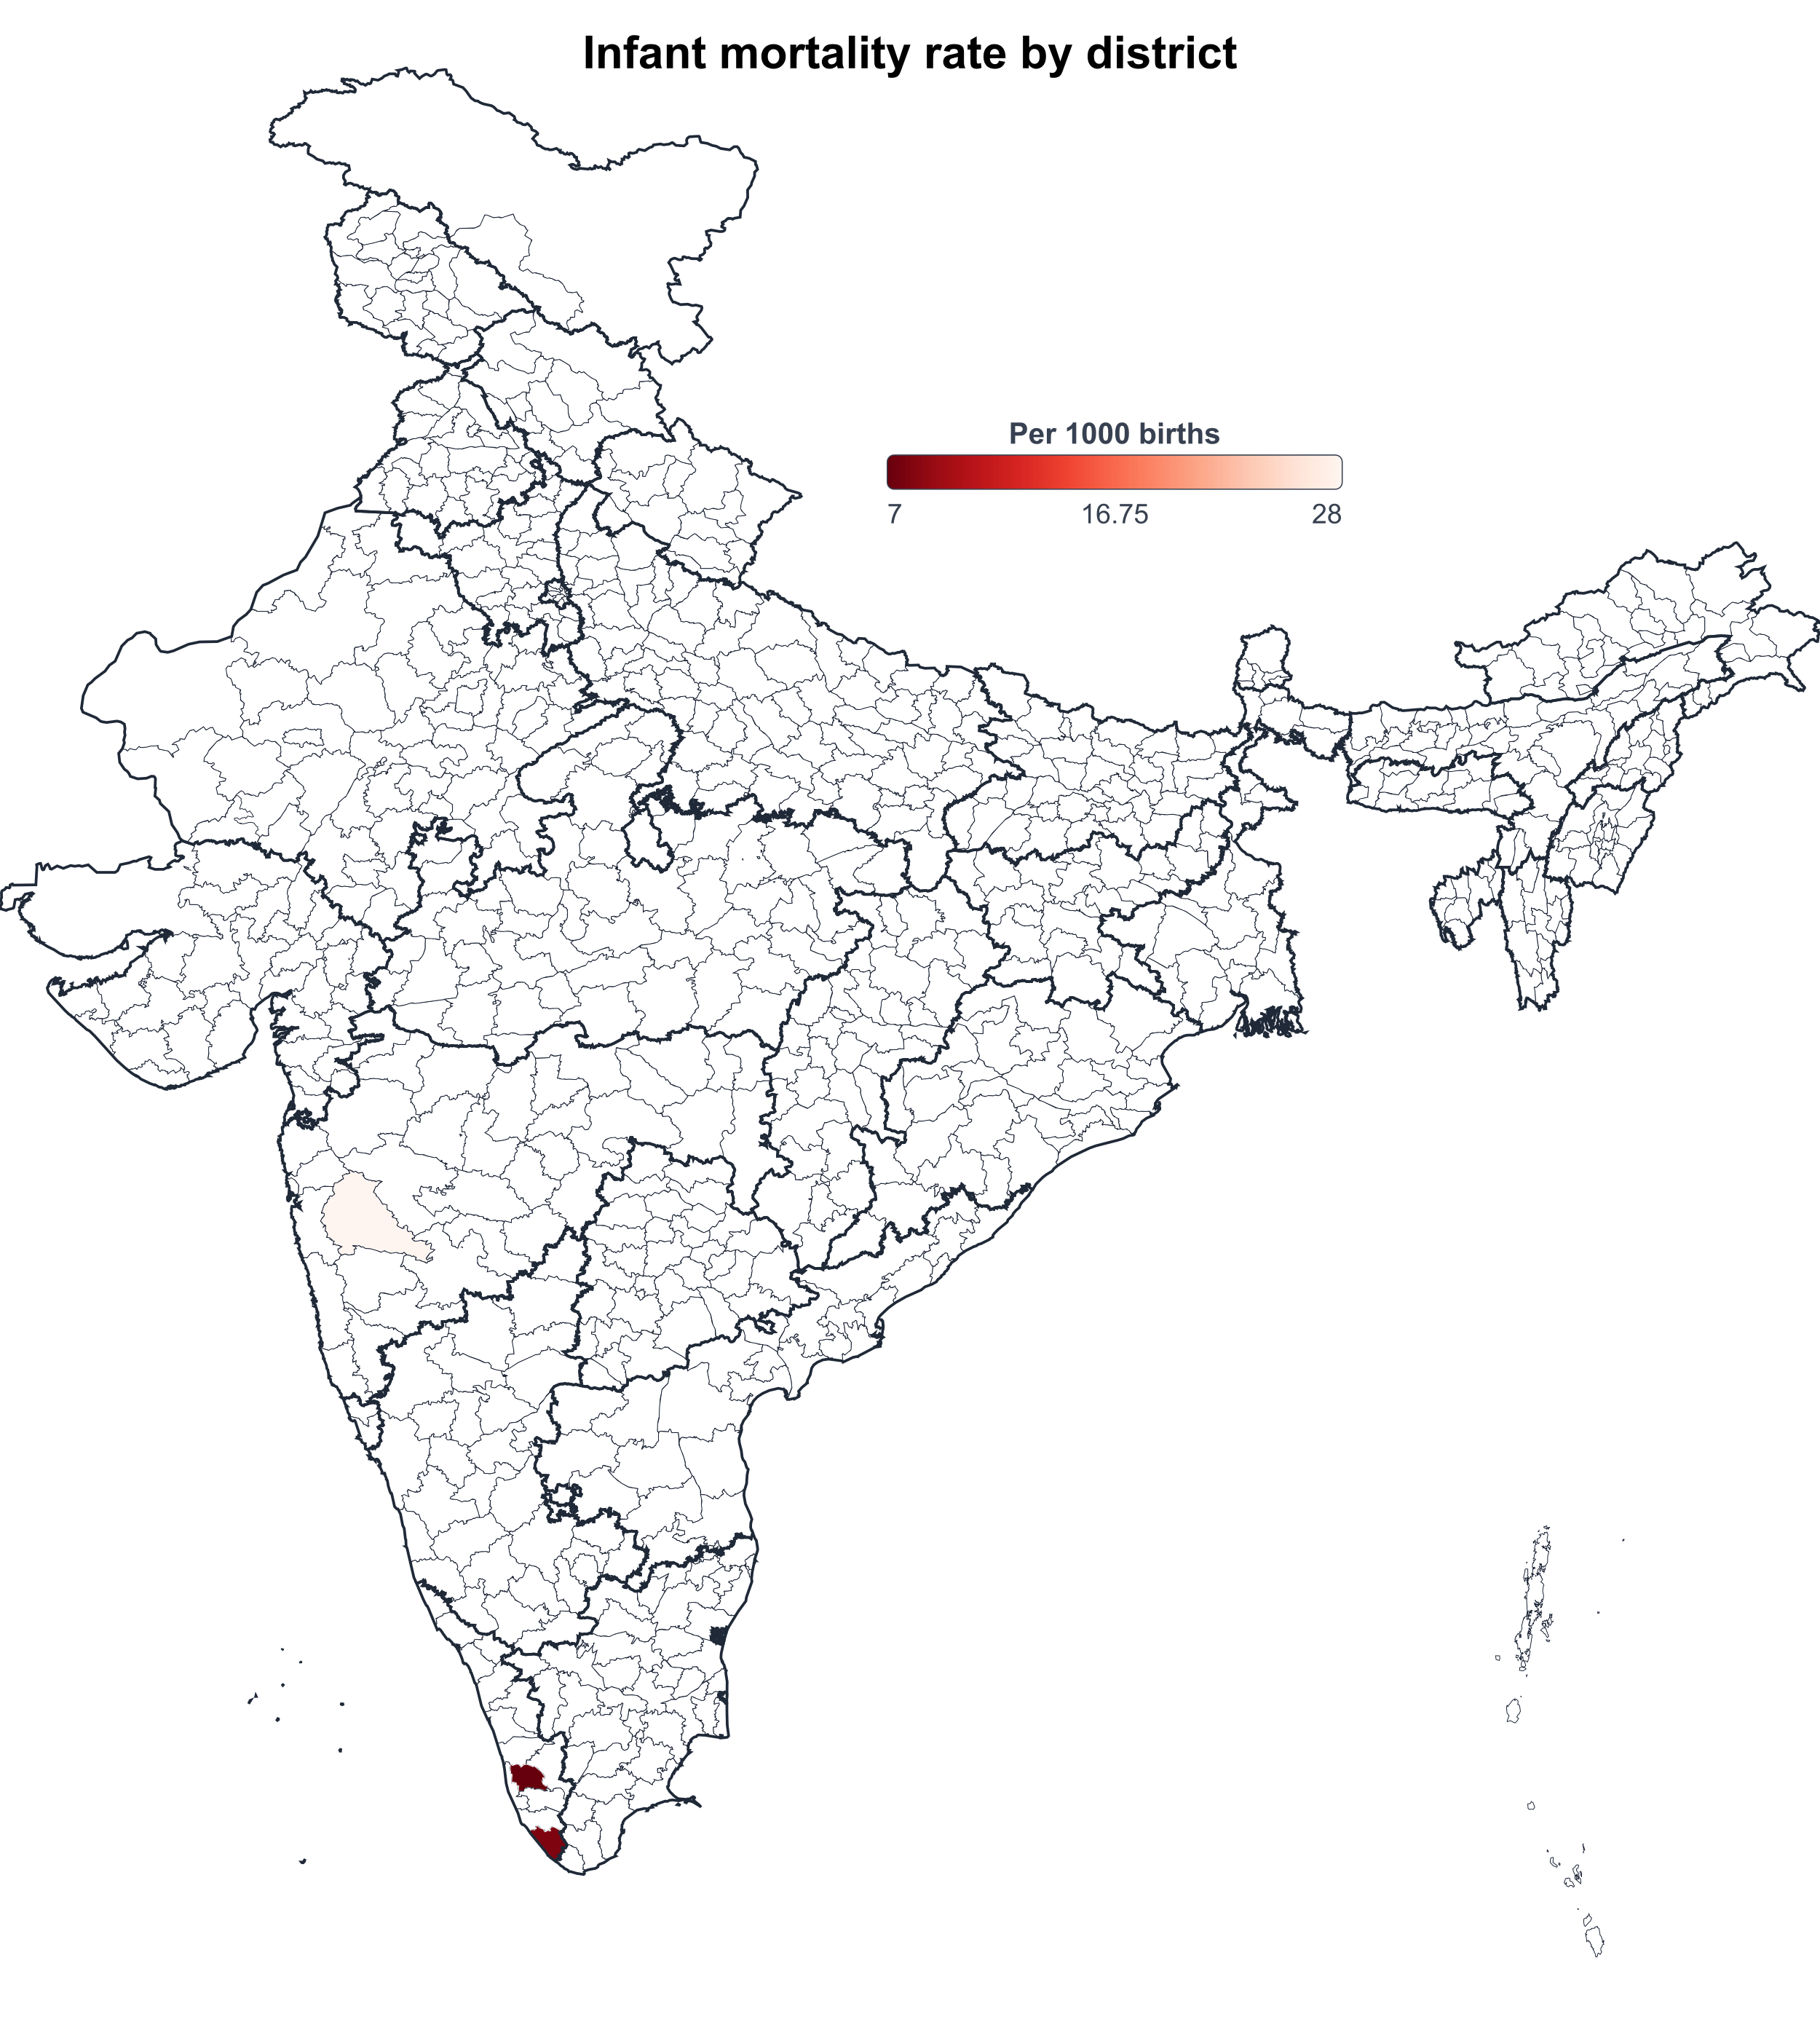

In [ ]:
# Dataframe with custom column names
custom_districts = pd.DataFrame(
    {
        "state_name": ["Maharashtra", "Maharashtra", "Kerala", "Kerala"],
        "district_name": ["Mumbai", "Pune", "Thiruvananthapuram", "Kottayam"],
        "infant_mortality": [24.0, 28.0, 8.0, 7.0],
    }
)

# Convert using helper function
data = BharatViz.from_dataframe_districts(
    custom_districts,
    state_col="state_name",
    district_col="district_name",
    value_col="infant_mortality",
)

# Generate map
bv.generate_districts_map(
    data,
    title="Infant mortality rate by district",
    legend_title="Per 1000 births",
    color_scale="reds",
    invert_colors=True,  # Lower is better
    show=True,
)

---

# Advanced features

## Get metadata

In [ ]:
# Generate map and get metadata
result = bv.generate_map(
    state_data,
    title="Gdp growth with metadata",
    formats=["png", "svg", "pdf"],
    return_all=True,
)

# Access metadata
print("Map statistics:")
print(f"  Min value: {result['metadata']['minValue']}")
print(f"  Max value: {result['metadata']['maxValue']}")
print(f"  Mean value: {result['metadata']['meanValue']:.2f}")
print(f"  Color scale: {result['metadata']['colorScale']}")


Map statistics:
  Min value: 6.5
  Max value: 8.7
  Mean value: 7.71
  Color scale: spectral

 Exports generated: 3
  - PNG
  - SVG
  - PDF


## Inverted color scales

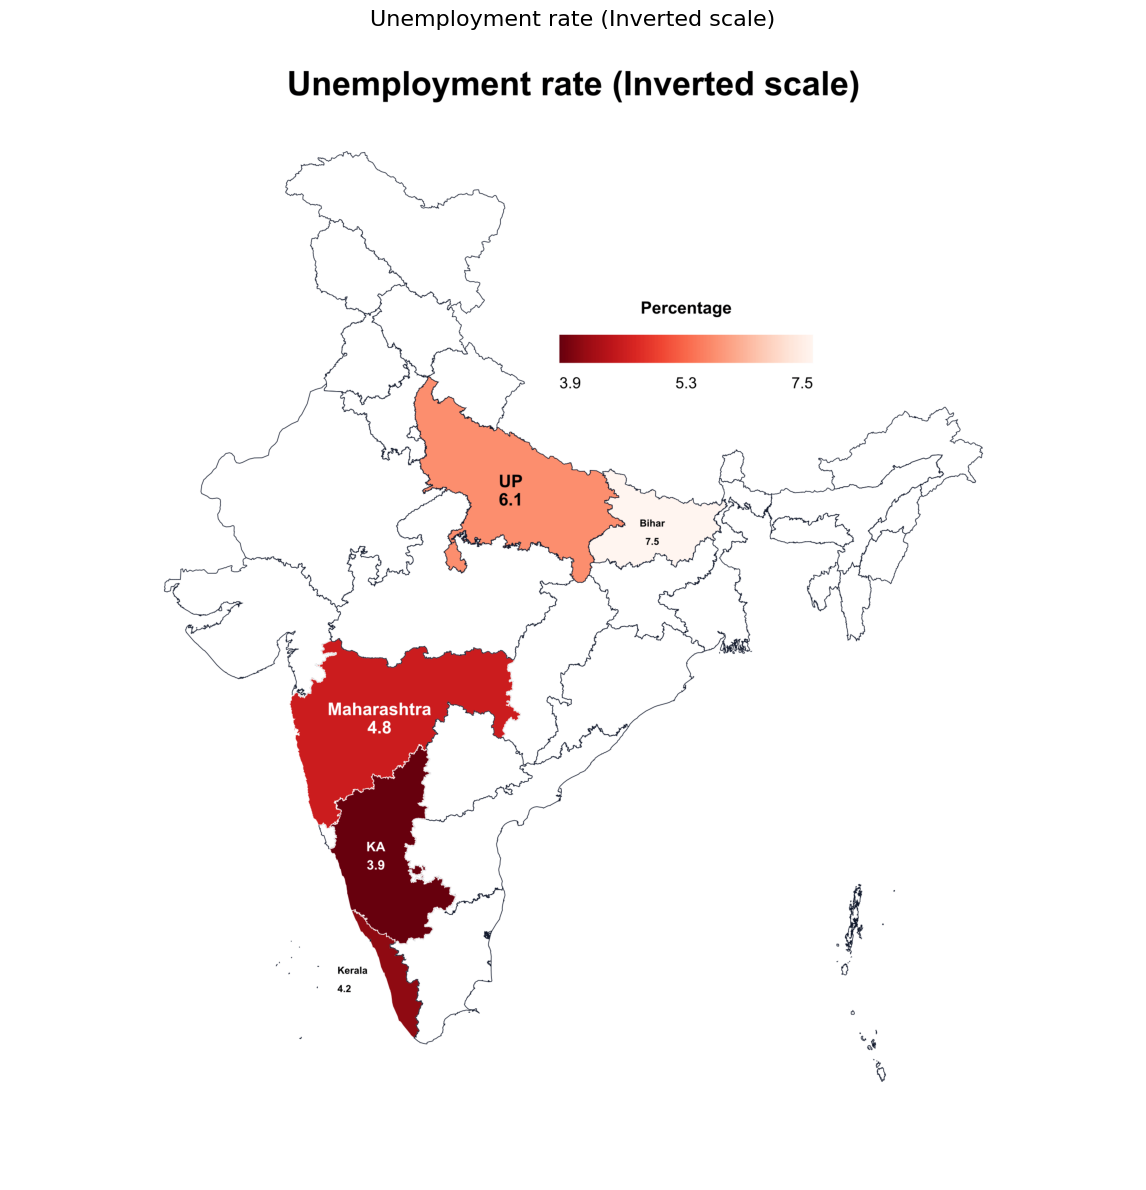

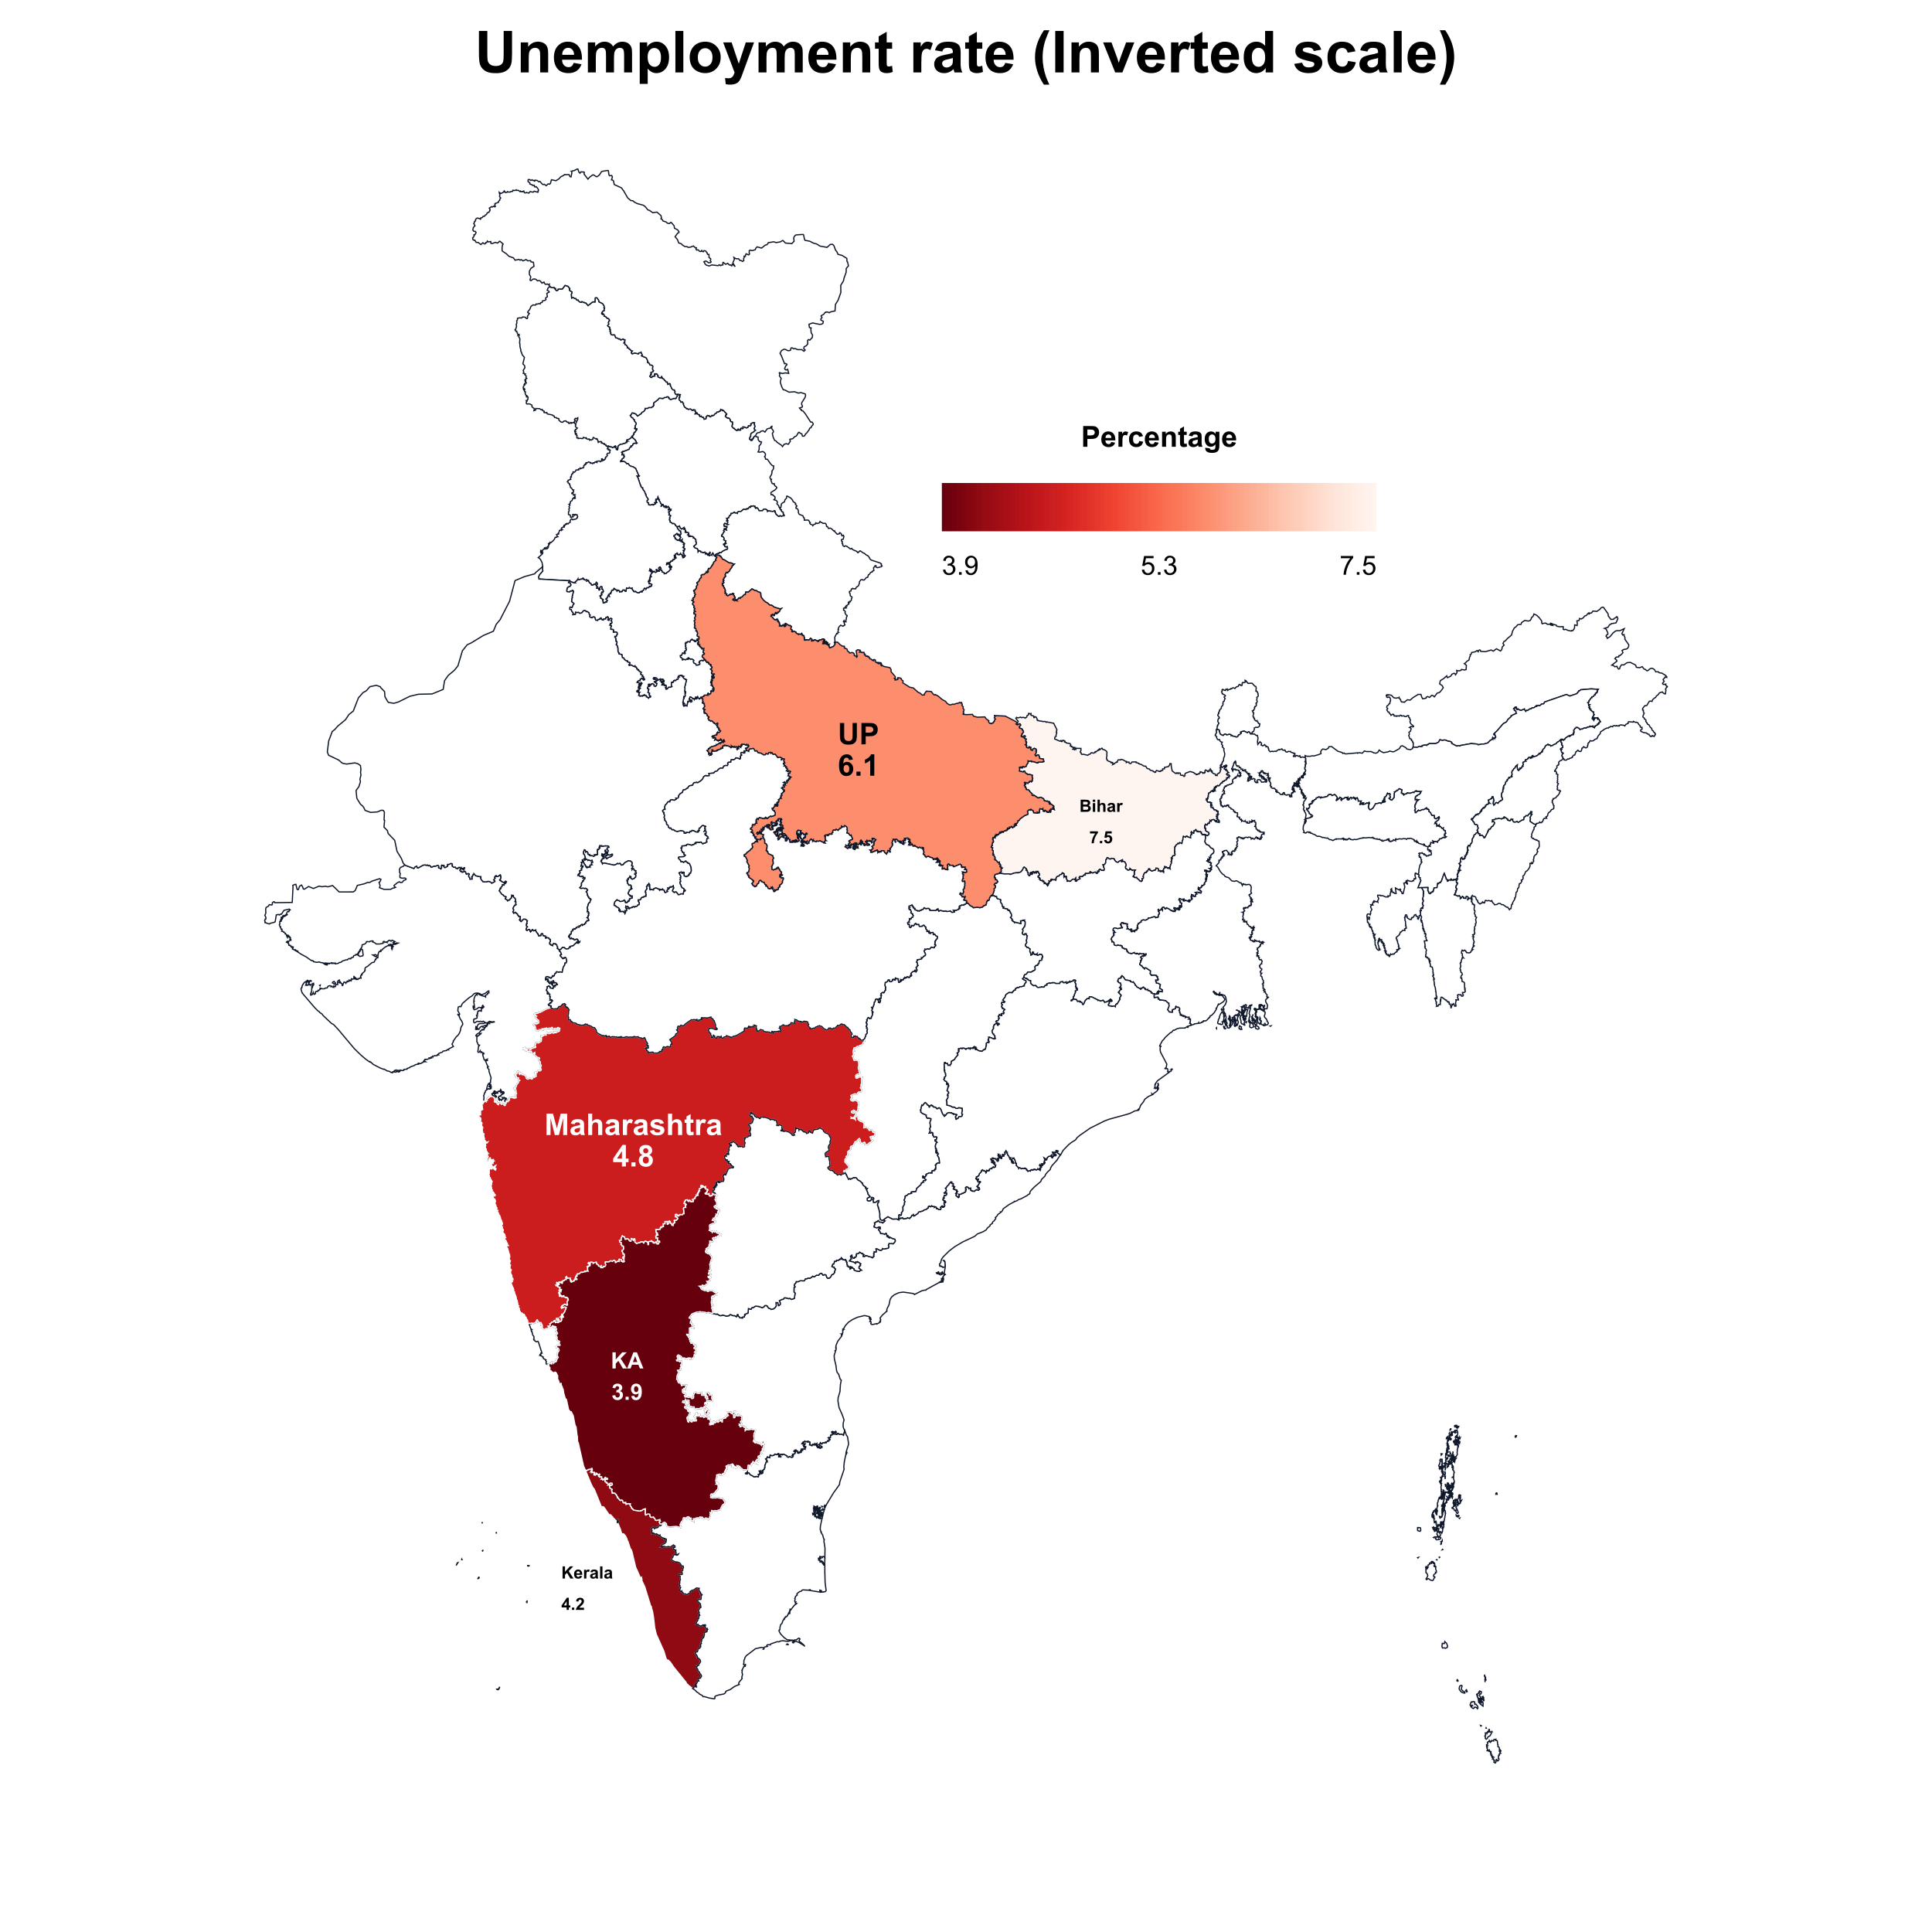

In [ ]:
# For metrics where lower is better (e.g., unemployment, mortality)
unemployment_data = {
    "Kerala": 4.2,
    "Maharashtra": 4.8,
    "Karnataka": 3.9,
    "Bihar": 7.5,
    "Uttar Pradesh": 6.1,
}

bv.generate_map(
    BharatViz.from_dict(unemployment_data),
    title="Unemployment rate (Inverted scale)",
    legend_title="Percentage",
    color_scale="reds",
    invert_colors=True,  # Red for high unemployment
    show=True,
)

##  Hide labels for cleaner maps

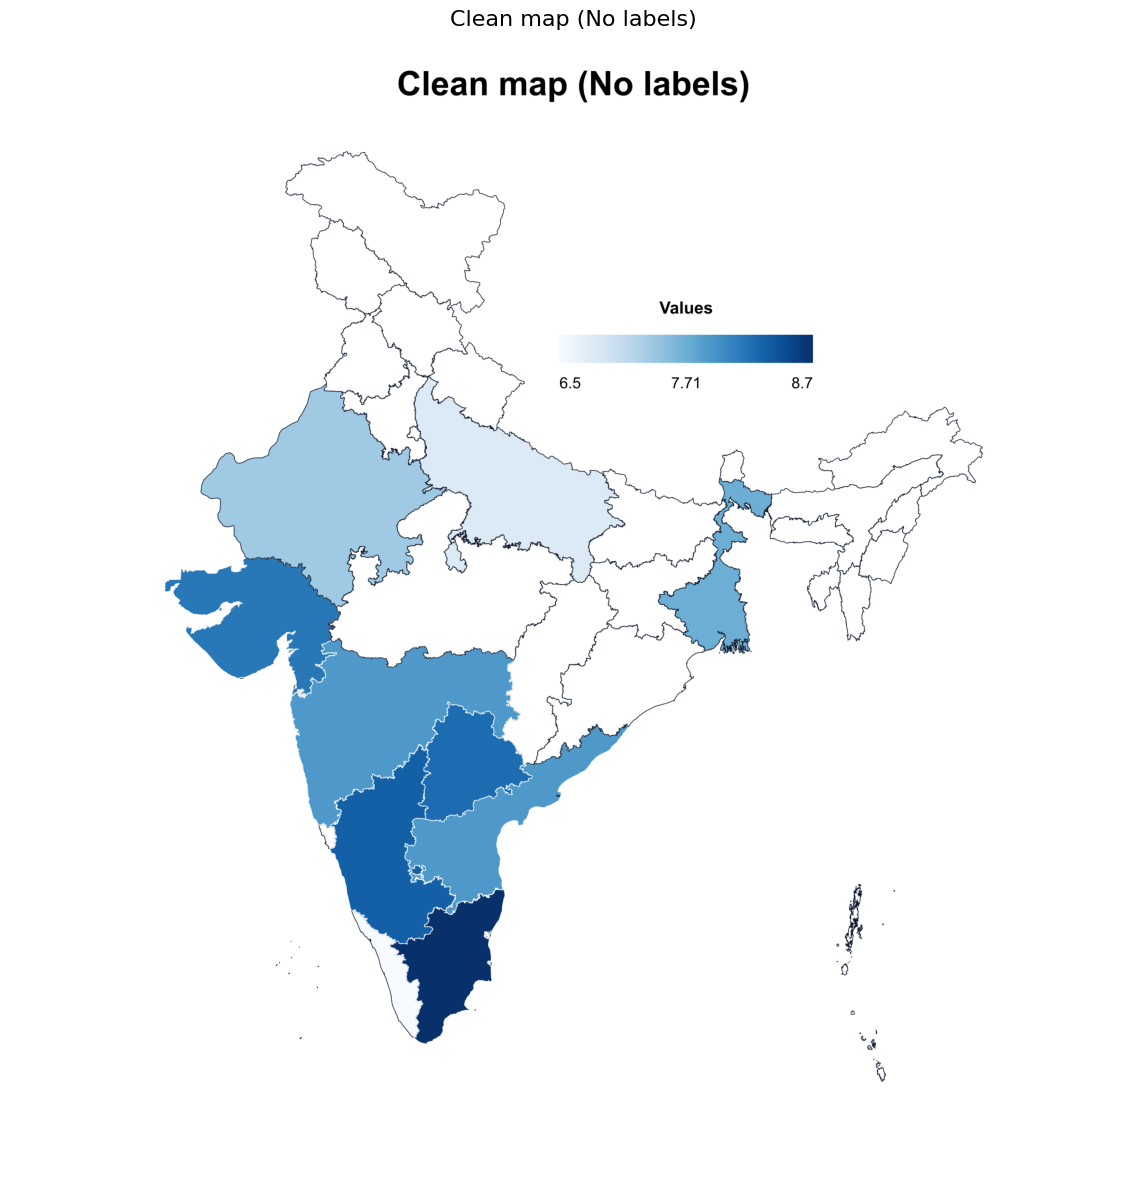

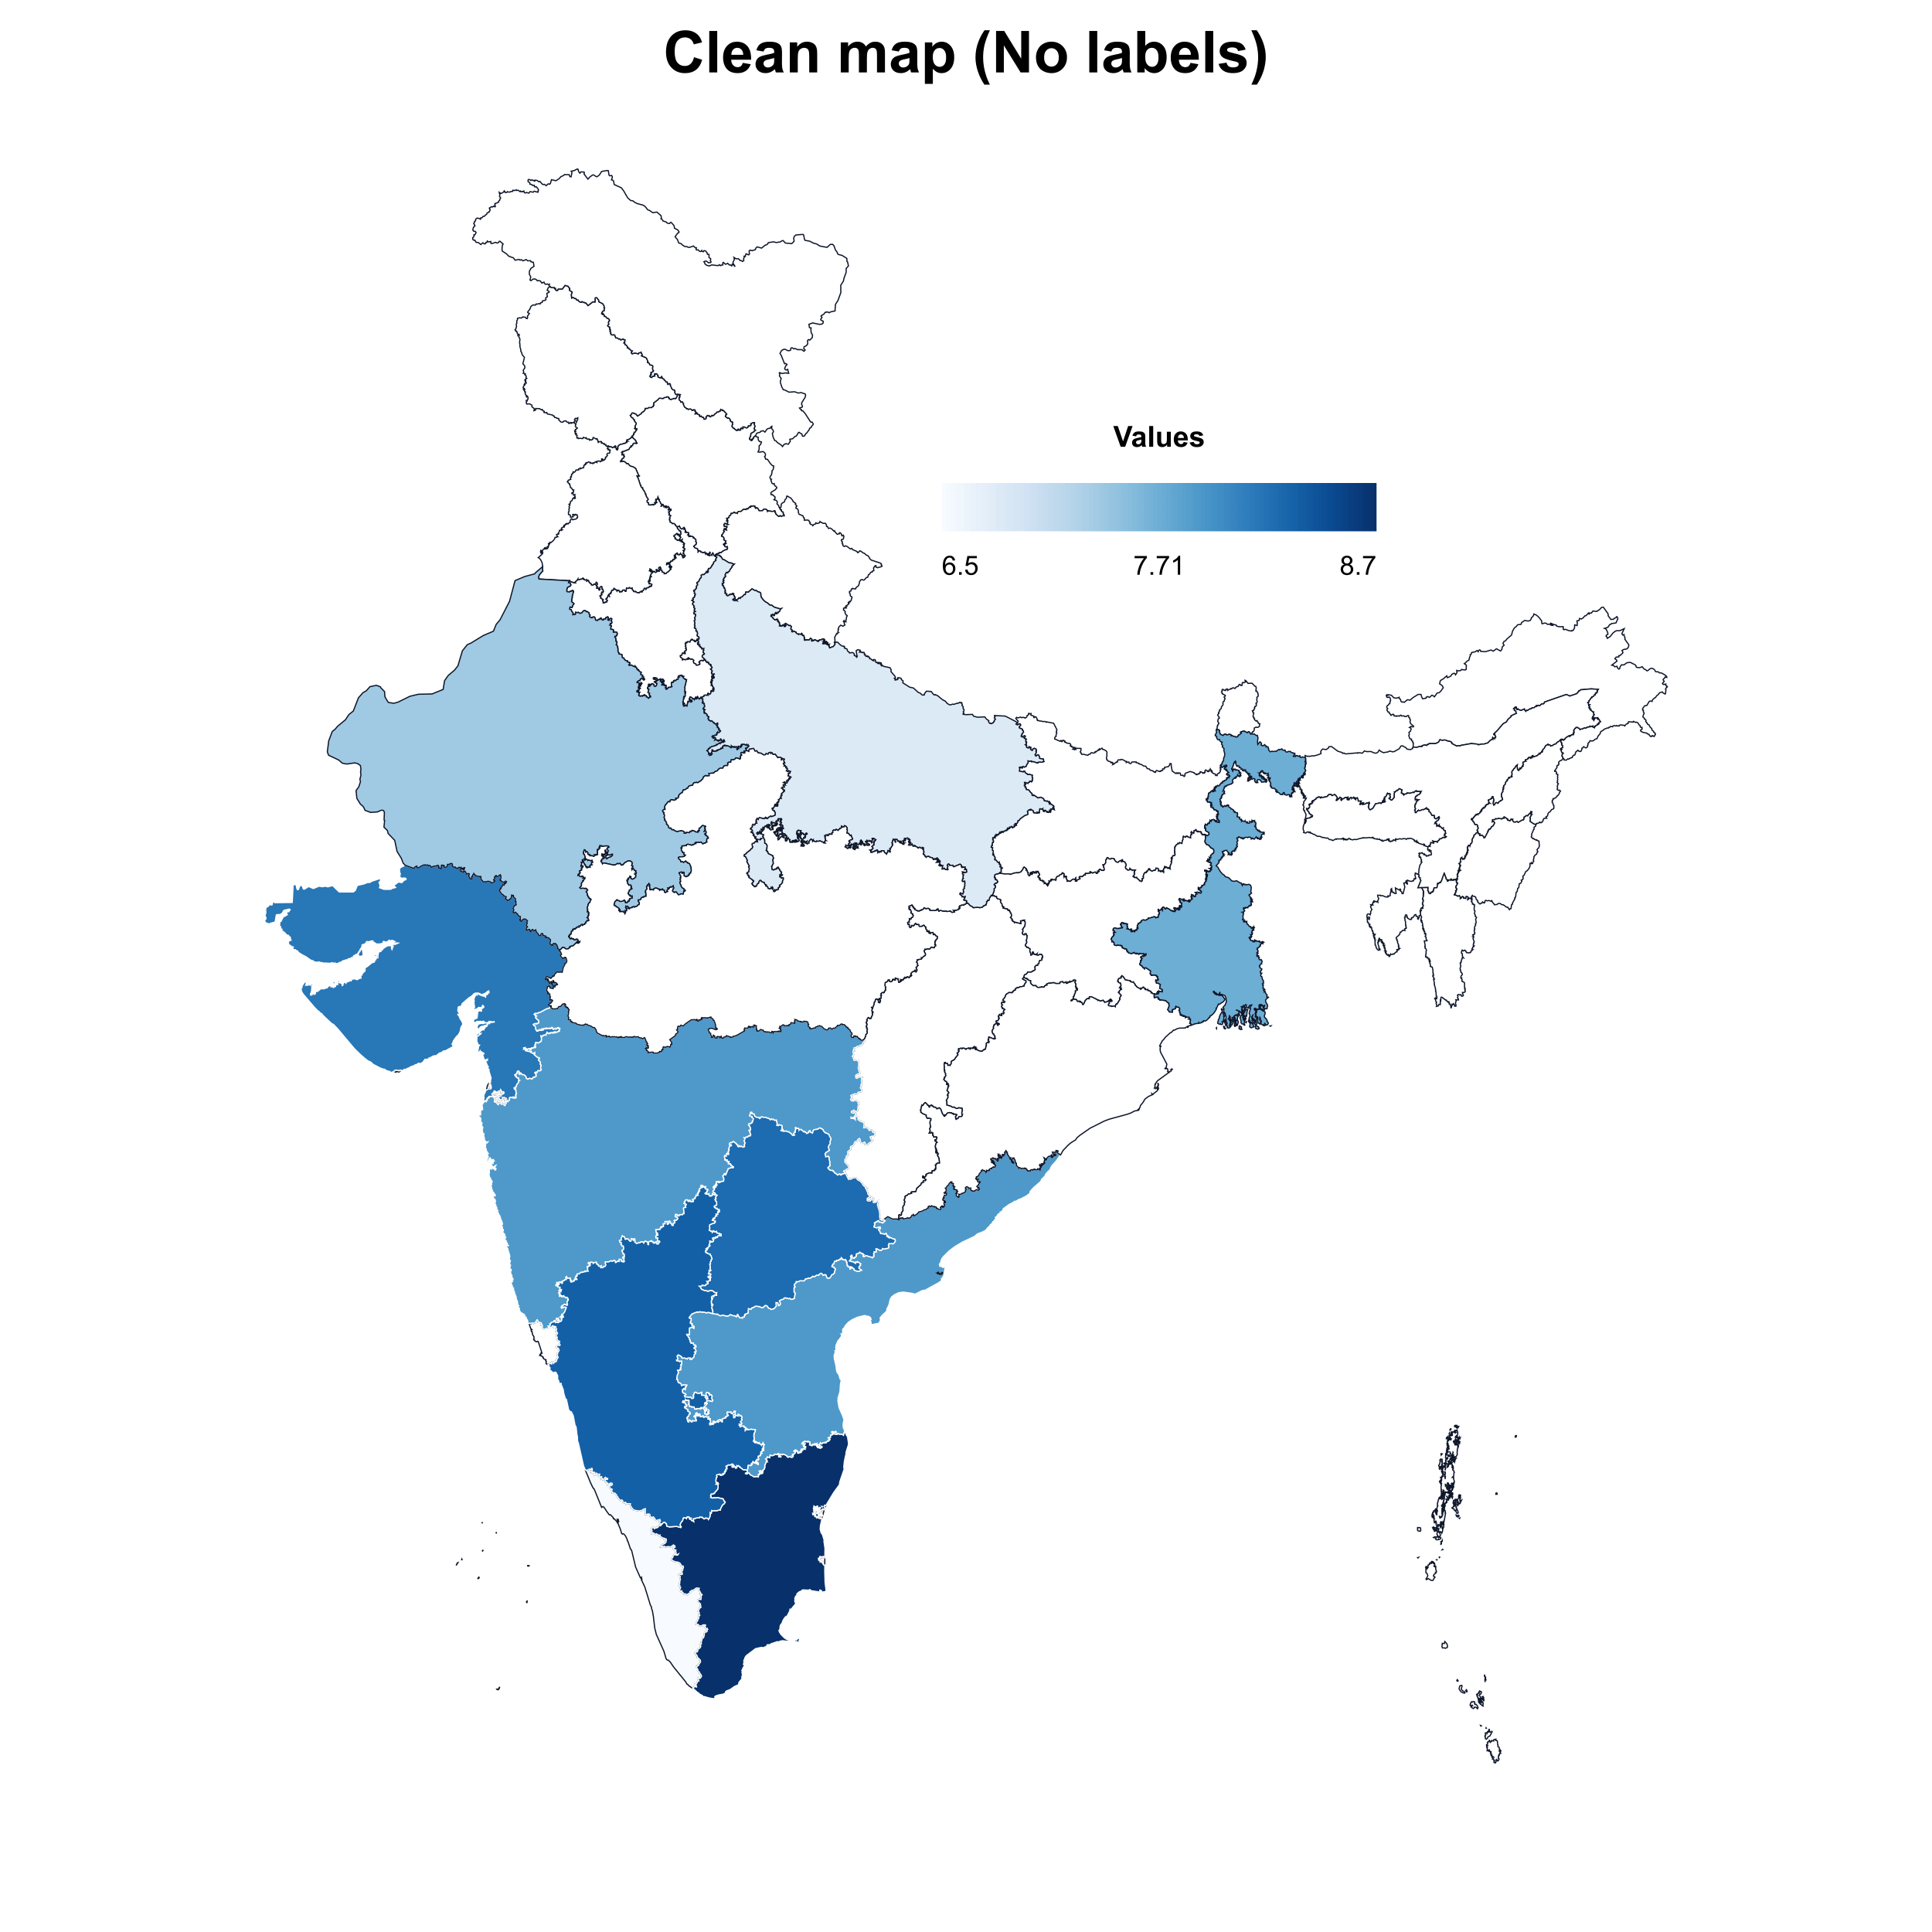

In [ ]:
# Generate map without labels
bv.generate_map(
    state_data,
    title="Clean map (No labels)",
    color_scale="blues",
    hide_state_names=True,
    hide_values=True,
    show=True,
)

---

# Quick Reference


### States
```python
# From dictionary - quickest!
quick_map(BharatViz.from_dict({'Kerala': 93.9}), title="My map")

# From dataframe
bv.generate_map(df, show=True)

# Save pdf
bv.save_all_formats(data, basename="my_map")
```

### Districts
```python
# From list
quick_districts_map(data, title="Districts", map_type='LGD')

# From dataframe
bv.generate_districts_map(df, map_type='LGD', show=True)

# Save pdf
bv.save_all_formats(data, basename="districts", map_type="districts")
```

## Available color scales

**Sequential:** `blues`, `greens`, `reds`, `oranges`, `purples`, `pinks`, `viridis`, `plasma`, `inferno`, `magma`

**Diverging:** `spectral`, `rdylbu`, `rdylgn`, `brbg`, `piyg`, `puor`

## Map types (Districts)

- **LGD**: Latest Government of India district boundaries
- **NFHS5**: National Family Health Survey 5 (2019-21)
- **NFHS4**: National Family Health Survey 4 (2015-16)

---
